<a href="https://colab.research.google.com/github/NavyaSaxena29/India-Real-Estate-Price-Prediction/blob/main/India_Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

India's Real Estate Price Prediction**


# Part 1: Problem Statement

India’s real estate market is one of the largest and most dynamic in the world, driven by rapid urbanization, diverse regional economies, and evolving buyer preferences. In this project, we explore a comprehensive dataset of over 330,000 property listings across India—capturing attributes from geographic coordinates and city/suburb classifications to unit sizes, pricing metrics, and builder information.

Our dual focus is on two complementary objectives: first, to develop robust models that can accurately forecast property prices; and second, to illuminate the key factors—whether location, size, furnishing, or developer   most strongly influence those prices. By combining data‐driven insights with advanced modeling techniques, we aim to deliver both reliable predictions and actionable intelligence.

Ultimately, this work provides stakeholders—developers, investors, and homebuyers—with a clearer understanding of market dynamics, enabling more informed decisions in one of India’s most complex and fast-moving sectors.

# Part 2: Data Loading and Pre-processing

We begin by importing the essential Python libraries—pandas and NumPy for data manipulation, matplotlib and seaborn for visualization, scikit-learn for modeling, xgboost for XGBoost, re for regular expression operations, and folium for geospatial mapping.

In [ ]:
from google.colab import drive
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import xgboost as xgb
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from datetime import datetime, timedelta
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer

## 2.1 Loading and Pre-processing Real Estate Data

Dataset used https://www.kaggle.com/datasets/manishmathias/residential-property-price-indian-cities-dataset/data


###2.1.1 Loading Data and Creating Dataframe
Since the data was huge, we uploaded it in google drive for convenience.

In [ ]:
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/Big Data Analytics/Big Data Analysis Project /Real Estate/Makaan_Properties_Buy.csv'
df = pd.read_csv(csv_path, encoding='cp1252')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.1.2 Analyzing Data Structure

In [ ]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  object 
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  object 
 13  Locality_ID               332096 non-null  i

In [ ]:
na_counts = df.isna().sum()
print(na_counts)

Property_Name               114270
Property_id                      0
Property_type                    0
Property_status              60442
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  182118
Builder_name                182118
Property_building_status         0
City_id                          0
City_name                        0
No_of_BHK                        0
Locality_ID                      0
Locality_Name                    2
Longitude                        0
Latitude                         0
Price                            0
Size                             0
Sub_urban_ID                     0
Sub_urban_name                   0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_commercial_Listin

A check on the data columns reveals that while key numeric and location fields are fully populated, over half of the listings lack builder information and about one-third have no property name. Roughly 18% also miss a property status.

### 2.1.3 Drop unnecessary columns and rows with null values

We’re cleaning up by removing columns that either won’t help our models or contain too many missing entries to be reliable. Fields like `Property_Name`, `builder_id`, `Builder_name`, and `Property_status` have large gaps, so we drop them rather than try to impute unreliable values. We also remove metadata (`Posted_On`, `Project_URL`, `description`) and redundant ID columns (`Locality_ID`, `City_id`, `Sub_urban_ID`) that don’t add any new information. Finally, since only three rows still contain any nulls after this pruning, we drop them outright to leave a fully complete dataset for modeling.

In [ ]:
# Drop unnecessary columns and columns with too many null values
too_many_nulls = ['Property_Name', 'Property_status', 'builder_id', 'Builder_name', 'Listing_Category']
not_needed = ['Posted_On', 'Project_URL', 'description']
repetitive_cols = ['Locality_ID', 'City_id', 'Sub_urban_ID']

df.drop(columns=too_many_nulls + not_needed + repetitive_cols, inplace=True)

In [ ]:
# Drop rows with any null values (only 3 rows)
df = df.dropna(how='any')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332094 entries, 0 to 332095
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_id               332094 non-null  int64  
 1   Property_type             332094 non-null  object 
 2   Price_per_unit_area       332094 non-null  object 
 3   Property_building_status  332094 non-null  object 
 4   City_name                 332094 non-null  object 
 5   No_of_BHK                 332094 non-null  object 
 6   Locality_Name             332094 non-null  object 
 7   Longitude                 332094 non-null  float64
 8   Latitude                  332094 non-null  float64
 9   Price                     332094 non-null  object 
 10  Size                      332094 non-null  object 
 11  Sub_urban_name            332094 non-null  object 
 12  is_furnished              332094 non-null  object 
 13  listing_domain_score      332094 non-null  float6

## 2.2 Data Cleaning

This section standardizes several text‐based fields into usable numeric columns using regular expressions for pattern matching. First, `Price_per_unit_area` is converted to string, commas are removed with `.str.replace(',', '')`, and `pd.to_numeric` coerces the result into a numeric type. Next, `Price` applies a regex `(r'[^\d.]')` to strip out any non-digit or non-decimal characters before casting to float. The `Size` string is parsed with `.str.extract(r'([\d,.]+)')` - a regex capturing the first numeric sequence - to derive area_sqft, then commas are removed and it’s converted to float. Similarly, `No_of_BHK` uses `.str.extract(r'(\d+)')` to pull the bedroom count into an integer bedrooms column. Finally, the original `Size` and `No_of_BHK` text columns are dropped, leaving only the new, clean numeric features for downstream analysis. After this cleaning, dropping any exact duplicates and resetting the index.

In [ ]:
# Normalize numeric columns stored as strings
df['Price_per_unit_area'] = pd.to_numeric(
    df['Price_per_unit_area']
      .astype(str)
      .str.replace(',', '', regex=False),
    errors='coerce'
)

df['Price'] = (
    df['Price']
      .astype(str)
      .str.replace(r'[^\d.]', '', regex=True)  # strip currency symbols, commas, spaces
      .astype(float)
)

# Parse 'Size' into a numeric sqft field
df['area_sqft'] = (
    df['Size']
      .str.extract(r'([\d,.]+)')  # capture the first number
      .replace(',', '', regex=True)
      .astype(float)
)

# Convert 'No_of_BHK' into a numeric feature
df['bedrooms'] = (
    df['No_of_BHK']
      .astype(str)
      .str.extract(r'(\d+)')      # get integer before 'BHK'
      .astype(int)
)

df.drop(columns=['No_of_BHK', 'Size'], inplace=True)

In [ ]:
# Drop exact duplicates
df.drop_duplicates(inplace = True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Property_id,Property_type,Price_per_unit_area,Property_building_status,City_name,Locality_Name,Longitude,Latitude,Price,Sub_urban_name,...,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,area_sqft,bedrooms
0,15446514,Apartment,4285,ACTIVE,Ahmedabad,Bopal,72.465103,23.037386,7500000.0,Ahmedabad West,...,4.0,False,True,True,False,False,False,False,1750.0,3
1,15367414,Apartment,7000,ACTIVE,Ahmedabad,Ambli,72.479668,23.027061,23688000.0,Ahmedabad West,...,4.0,False,True,True,False,False,False,False,3384.0,4
2,14683118,Apartment,5752,ACTIVE,Ahmedabad,Naryanpura,72.558502,23.055193,13200840.0,Ahmedabad West,...,4.0,False,False,True,True,False,False,False,2295.0,3
3,5476295,Apartment,2486,ACTIVE,Ahmedabad,Changodar,72.454720,22.940430,2283000.0,Ahmedabad South,...,4.0,False,False,True,True,False,False,False,918.0,2
4,15477040,Apartment,5324,ACTIVE,Ahmedabad,Shilaj,72.477890,23.043703,9371000.0,Ahmedabad West,...,4.0,False,True,True,False,False,False,False,1760.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261512 entries, 0 to 261511
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_id               261512 non-null  int64  
 1   Property_type             261512 non-null  object 
 2   Price_per_unit_area       261512 non-null  int64  
 3   Property_building_status  261512 non-null  object 
 4   City_name                 261512 non-null  object 
 5   Locality_Name             261512 non-null  object 
 6   Longitude                 261512 non-null  float64
 7   Latitude                  261512 non-null  float64
 8   Price                     261512 non-null  float64
 9   Sub_urban_name            261512 non-null  object 
 10  is_furnished              261512 non-null  object 
 11  listing_domain_score      261512 non-null  float64
 12  is_plot                   261512 non-null  bool   
 13  is_RERA_registered        261512 non-null  b

In [ ]:
df.head()

,Property_id,Property_type,Price_per_unit_area,Property_building_status,City_name,Locality_Name,Longitude,Latitude,Price,Sub_urban_name,...,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,area_sqft,bedrooms
0,15446514,Apartment,4285,ACTIVE,Ahmedabad,Bopal,72.465103,23.037386,7500000.0,Ahmedabad West,...,4.0,False,True,True,False,False,False,False,1750.0,3
1,15367414,Apartment,7000,ACTIVE,Ahmedabad,Ambli,72.479668,23.027061,23688000.0,Ahmedabad West,...,4.0,False,True,True,False,False,False,False,3384.0,4
2,14683118,Apartment,5752,ACTIVE,Ahmedabad,Naryanpura,72.558502,23.055193,13200840.0,Ahmedabad West,...,4.0,False,False,True,True,False,False,False,2295.0,3
3,5476295,Apartment,2486,ACTIVE,Ahmedabad,Changodar,72.454720,22.940430,2283000.0,Ahmedabad South,...,4.0,False,False,True,True,False,False,False,918.0,2
4,15477040,Apartment,5324,ACTIVE,Ahmedabad,Shilaj,72.477890,23.043703,9371000.0,Ahmedabad West,...,4.0,False,True,True,False,False,False,False,1760.0,3


# Part 3: Exploratory Data Analysis

With the dataset now cleaned and all key fields converted to numeric or properly encoded formats, we turn to exploratory data analysis (EDA) to uncover underlying patterns and inform our modeling.

## 3.1 Number of listings by different categories

We chose a bar chart to show the number of listings across categories because it provides a clear, intuitive way to compare discrete groups—each bar’s height directly corresponds to the count of listings in that category. This makes it easy to spot which property types, cities, or bedroom counts dominate the dataset at a glance, and to quickly identify relative differences between categories without any distortion from overlapping points or complex scales.

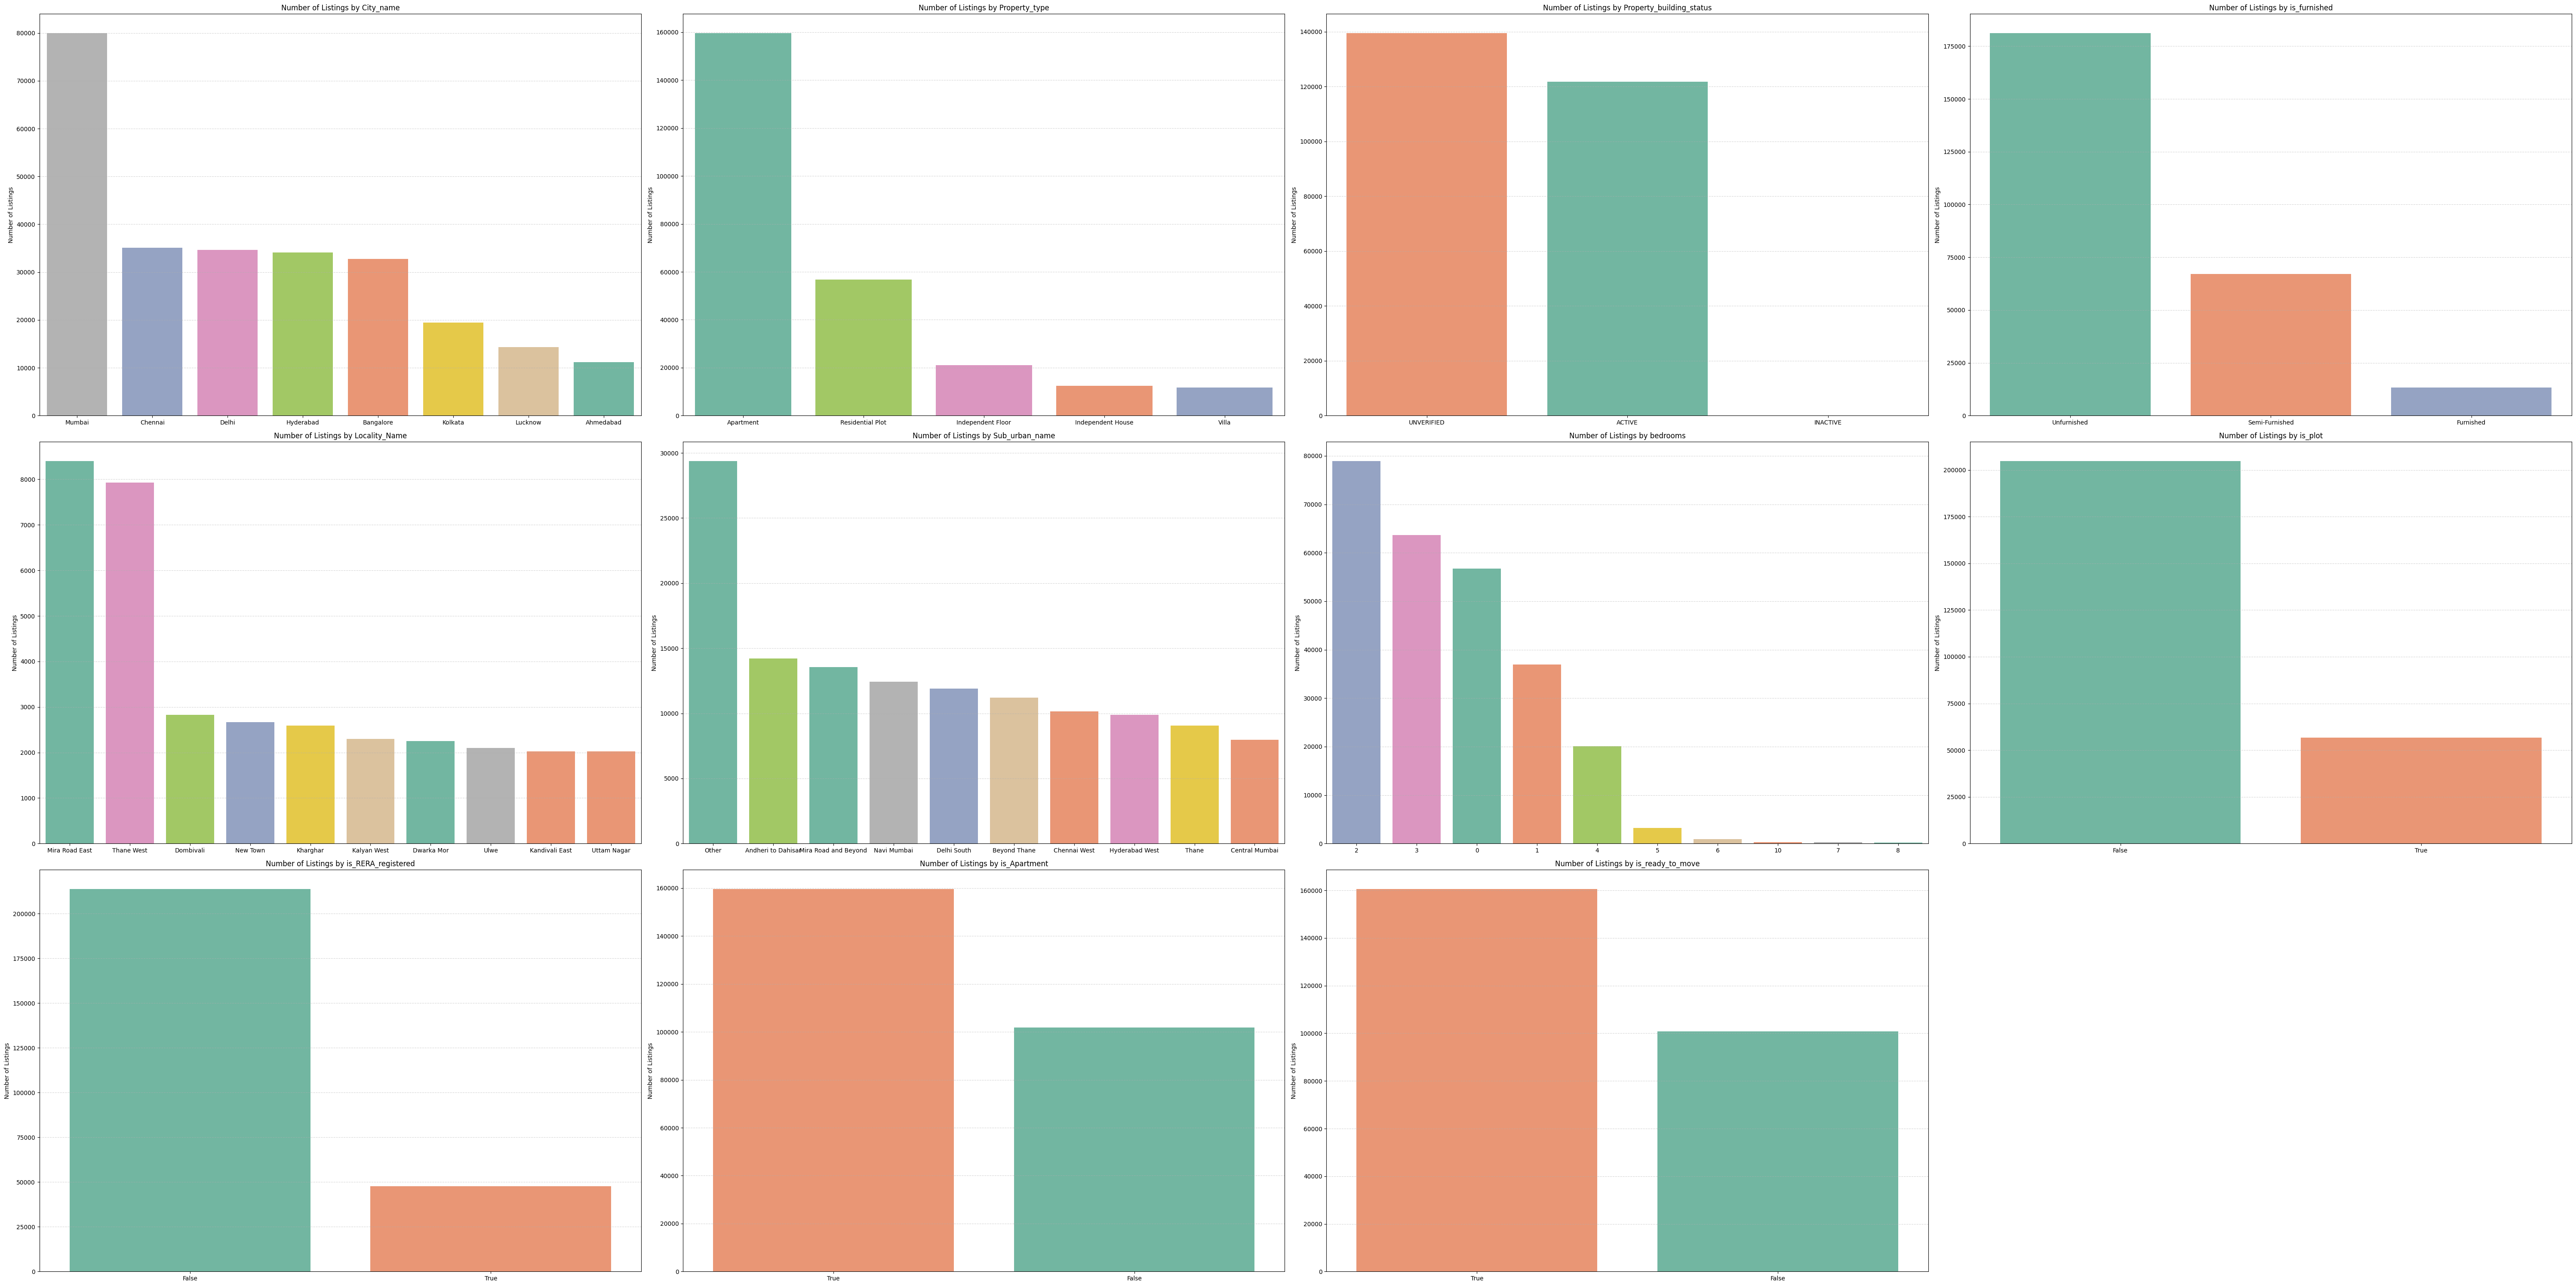

In [ ]:
# List of the columns to subplot
features = [
    'City_name',
    'Property_type',
    'Property_building_status',
    'is_furnished',
    'Locality_Name',
    'Sub_urban_name',
    'bedrooms',
    'is_plot',
    'is_RERA_registered',
    'is_Apartment',
    'is_ready_to_move'
]

n = len(features)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15*n_cols, 10*n_rows))
axes = axes.flatten()

# Plot for each column
for ax, feat in zip(axes, features):
    # for each feature, take its top 10 levels
    top10 = df[feat].value_counts().head(10).index
    sns.countplot(
        data=df[df[feat].isin(top10)],
        x=feat,
        hue=feat,
        order=top10,
        ax=ax,
        palette='Set2',
        legend=False
    )
    ax.set_title(f'Number of Listings by {feat}')
    ax.set_xlabel('')
    ax.set_ylabel('Number of Listings')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Turn off any unused subplots
for empty_ax in axes[n:]:
    empty_ax.axis('off')

plt.tight_layout()
plt.show()


From these bar‐chart subplots we can see several clear patterns in India’s listing inventory:

* **City concentration:** Mumbai leads by a wide margin with roughly 80,000 listings, nearly double that of the next tier (Chennai, Delhi, Hyderabad at approx. 35,000 each). Bangalore follows with  approx.35,000, and other metros (Kolkata, Lucknow, Ahmedabad) trail under 20,000.

* **Property types:** Apartments dominate the market (approx. 160,000 listings), followed by residential plots (approx. 55,000). Independent floors, houses, and villas make up only a small fraction of total supply.

* **Building status:** Over half the listings are either "Unverified" (approx.140,000) or "Active" (approx. 120,000), with close to zero "Inactive." This suggests a large portion of the dataset may need status-based filtering or validation.

* **Furnishing levels:** The vast majority of units are unfurnished (approx. 180,000), a smaller share is semi-furnished (approx. 70,000), and fully furnished homes are quite rare (approx. 15,000).

* **Locality:** Mira Road East (approx. 9,000) and Thane West (approx. 8,000) alone account for over one-third of that city’s listings. Other suburbs each contribute a few thousand listings.

* **Suburban zones:** The "Other" catch-all beyond major zones still contains approx. 30,000 listings, followed by clusters like "Andheri to Dahisar" and  "Mira Roadand Beyond" (approx. 15,000 each).

* **Bedrooms distribution:** 2 BHK units are most common (approx. 80,000), then 3 BHK (approx. 65,000), 0 BHK (approx. 55,000), 1 BHK (approx. 35,000), with 4 BHKs (approx. 20,000) and larger configurations increasingly rare.

* **Plot vs. built:** Only 65,000 listings are plots, the rest are built units.

* **RERA registration:** Roughly 250,000 lack a valid RERA registration, leaving only 50,000 registered.

* **Apartment vs. non-apartment:** Apartments account for 160,000 listings, with non-apartment units making up the remainder.

* **Move-in readiness:** About 160,000 listings are marked "ready to move," while others are still under construction.

## 3.2 Average Price of Listings by different categories (for top 10 levels)

Visualizing the average listing price across the top 10 categories lets us quickly spot which segments - whether cities, property types, or bedroom counts - carry the biggest premiums and which sit at the lower end of the market. By focusing on the most frequent levels, we ensure each bar reflects a robust sample size, avoid noise from sparsely populated groups, and make it easy to compare relative price differences at a glance. This concise view helps both modelers and stakeholders prioritize high-value segments and tailor strategies accordingly.

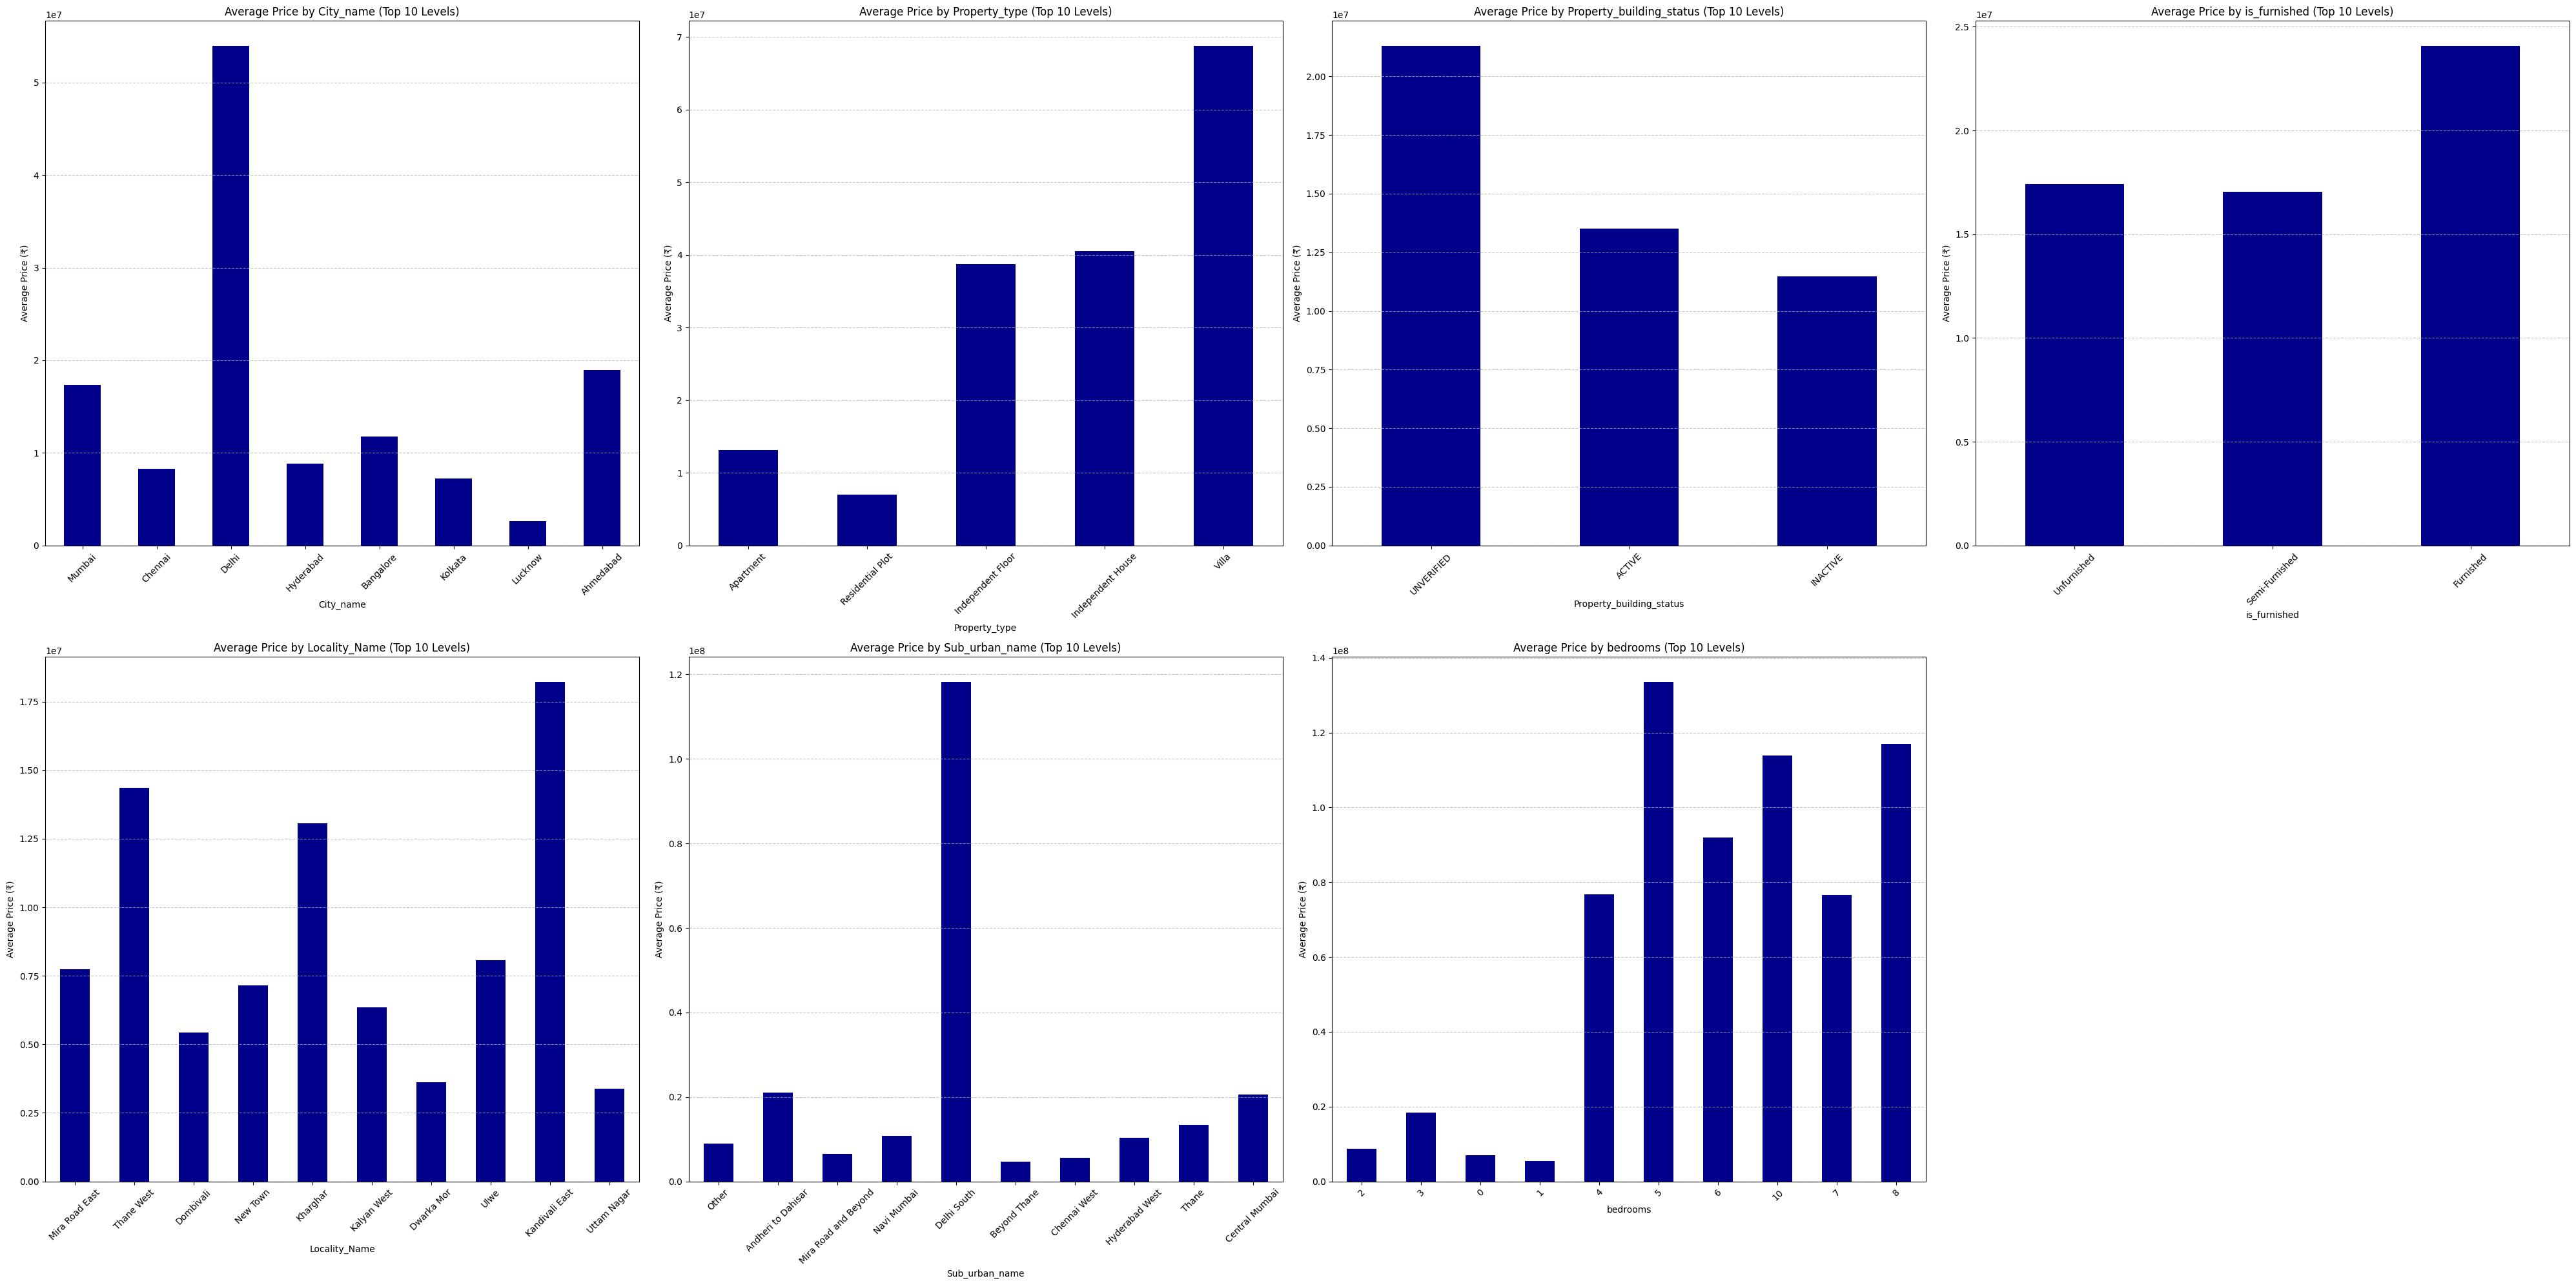

In [ ]:
features = [
    'City_name',
    'Property_type',
    'Property_building_status',
    'is_furnished',
    'Locality_Name',
    'Sub_urban_name',
    'bedrooms'
]

n = len(features)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 10 * n_rows))
axes = axes.flatten()

# Loop through features and plot average Price for top 10 levels
for ax, feat in zip(axes, features):
    # Find top 10 most frequent levels
    top10 = df[feat].value_counts().head(10).index
    # Compute mean Price for those levels
    avg_price = df[df[feat].isin(top10)].groupby(feat)['Price'].mean().loc[top10]
    # Plot bar chart
    avg_price.plot(
        kind='bar',
        ax=ax,
        color='darkblue'
    )
    ax.set_title(f'Average Price by {feat} (Top 10 Levels)')
    ax.set_xlabel(feat)
    ax.set_ylabel('Average Price (₹)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)


# Turn off any unused subplots
for empty_ax in axes[n:]:
    empty_ax.axis('off')

plt.tight_layout()
plt.show()


Below are the same key findings:

* **Delhi’s price premium**
As India’s political and commercial capital, Delhi (and the wider NCR region) combines limited land availability, high incomes, and strong institutional demand—driving per‐unit prices well above other metros.

* **Villas, independent houses and independent floor lead by property type**
These typologies occupy larger plots, often in gated communities or luxury enclaves, so their average sizes far exceed more space‐efficient apartments or bare land.

* **Fully furnished units**
Fully furnished homes save buyers time and cost in buying new furniture, so developers charge extra for high‐end finishes, appliances, and décor—reflected in higher average prices.

* **"Unverified" listings averaging above "Active"**
Many premium, newly launched projects appear as "Unverified" on portals until official approvals go through. Their marketing previews often target high-net-worth buyers, inflating early average prices.

* **Locality hotspots**
These suburbs combine comparatively affordable land with improving infrastructure - transit corridors, new highways, and commercial developments - making them both accessible and investment-attractive.

* **Price scale by bedrooms**
Bigger layouts inherently cost more - land and construction scale with area - so multi-BHK homes, often targeting multi-generation families or luxury buyers, sit at the top of the price ladder.

Each of these patterns reflects a mix of supply constraints, infrastructure maturity, developer positioning, and buyer preferences that shape India’s varied real-estate landscape.

## 3.3 Distribution of Property Prices by Key Categories (Log Scale)


We chose these log-scaled boxen plots because they let us compare full price distributions - including medians, spread, and outliers - across multiple categories in one compact view. The log scale spreads out the heavily right-skewed price data so that lower-priced listings aren’t all squashed at the bottom, while the boxen style shows multiple quantile 'hinges' to reveal more detail in both bulk and tail regions. This combination makes it easy to see both typical price levels and the extent of high-end listings for each group.

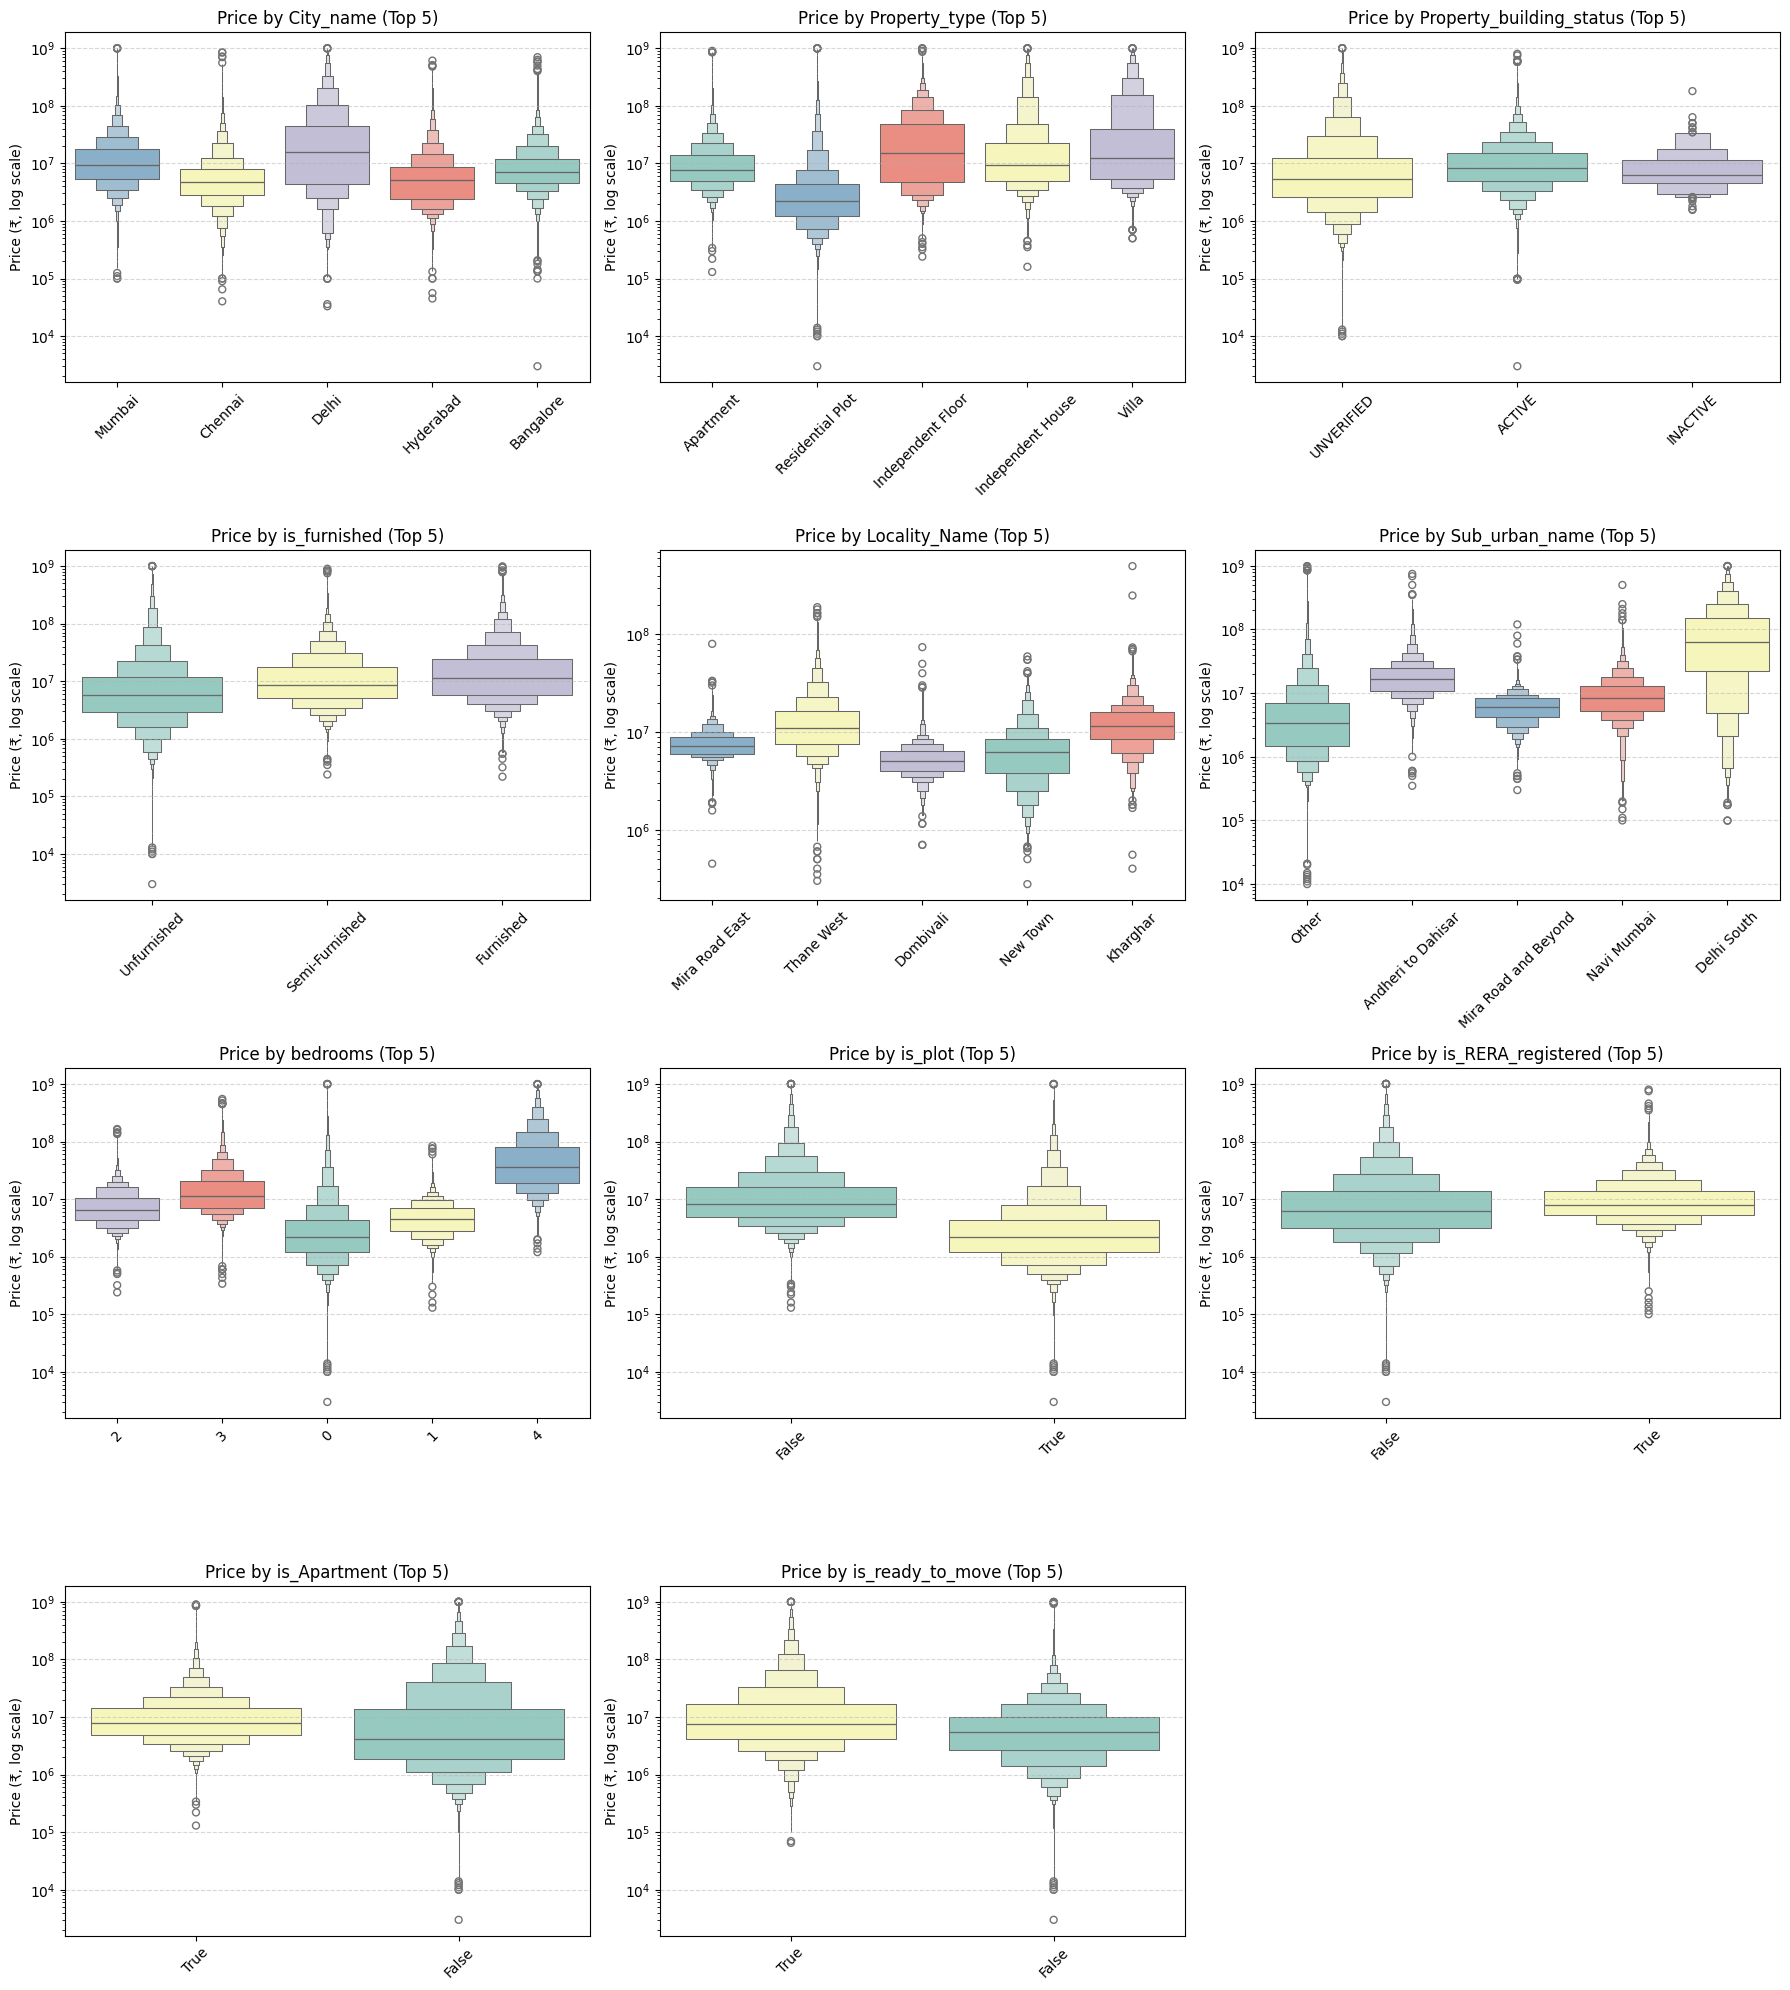

In [ ]:
features = [
    'City_name',
    'Property_type',
    'Property_building_status',
    'is_furnished',
    'Locality_Name',
    'Sub_urban_name',
    'bedrooms',
    'is_plot',
    'is_RERA_registered',
    'is_Apartment',
    'is_ready_to_move'
]

n = len(features)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for ax, feat in zip(axes, features):
    # Limit to top 5 levels
    top5 = df[feat].value_counts().head(5).index
    subset = df[df[feat].isin(top5)]

    sns.boxenplot(
        x=feat,
        hue=feat,
        y='Price',
        data=subset,
        order=top5,
        ax=ax,
        legend=False,
        palette='Set3'
    )
    ax.set_yscale('log')
    ax.set_title(f'Price by {feat} (Top 5)')
    ax.set_xlabel('')
    ax.set_ylabel('Price (₹, log scale)')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Turn off any unused subplots
for empty_ax in axes[n:]:
    empty_ax.axis('off')

plt.tight_layout()
plt.show()



Key observations:

* **City:** Delhi commands the highest median price, followed by Bangalore and Mumbai, with Chennai and Hyderabad trailing.

* **Property Type:** Villa and independent floor sit well above apartments and plots in median value.

* **Status & Registration:** Active and RERA-registered listings fetch higher medians than unverified, inactive, or unregistered ones.

* **Furnishing & Readiness:** Fully furnished and ready-to-move units carry clear price premiums over unfurnished or under-construction properties.

* **Bedrooms:** Median price rises steadily with bedroom count - 4 BHK homes are markedly pricier than 1–3 BHK units.

* **Plots:** Non-plots are substantially more expensive on average than bare land.

## 3.4 Price vs. Area Across Top 5 Localities in Major Indian Cities

These scatter plots let us directly visualize the core relationship between unit size and price within each city and compare how that relationship shifts across its most active neighborhoods. By plotting only the top five localities, we focus on areas with enough data to draw reliable conclusions. The charts reveal not just the overall upward trend but also how local premium levels, outlier luxury listings, and density of mid-range offerings vary from one suburb to the next.

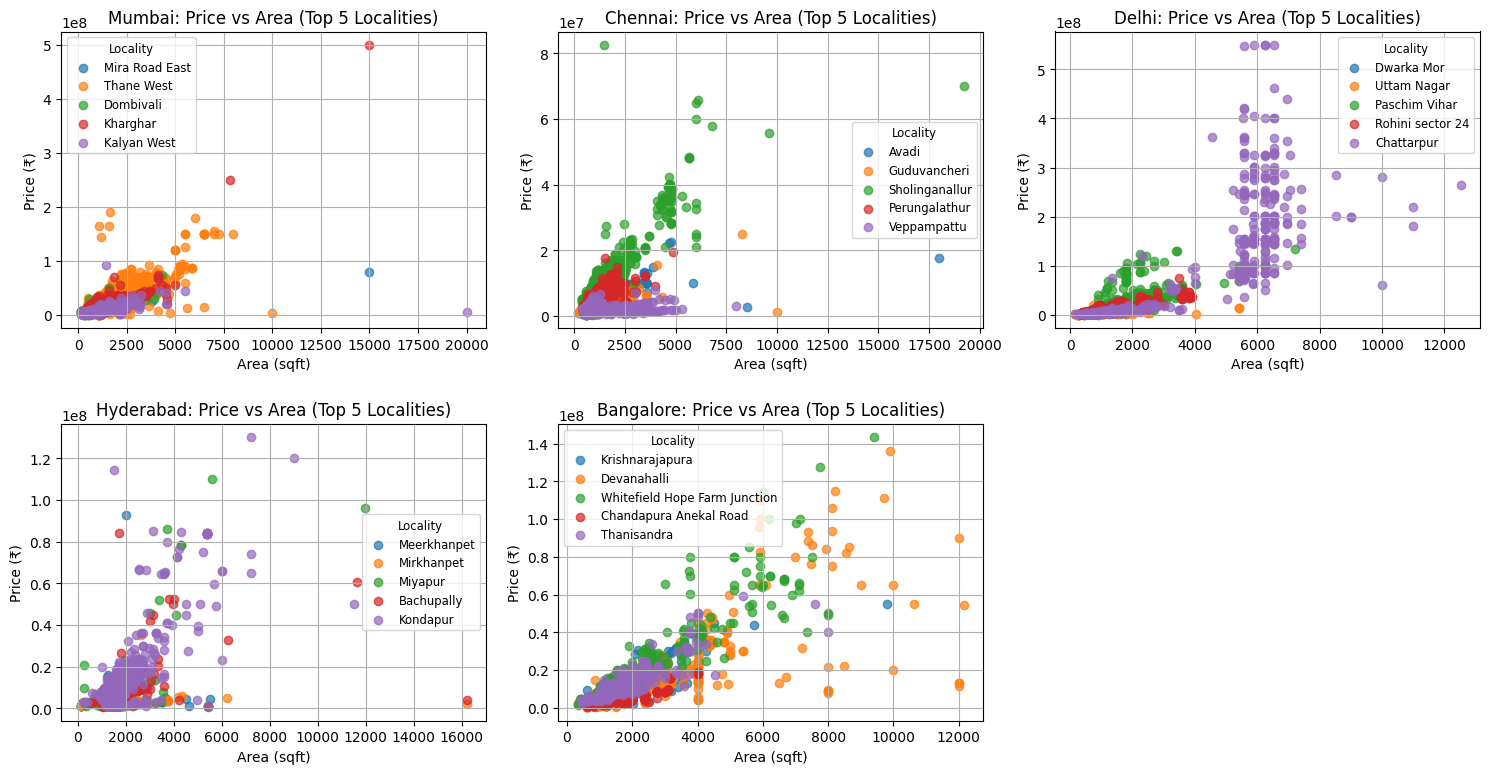

In [ ]:
# List of target cities
cities = ['mumbai', 'chennai', 'delhi', 'hyderabad', 'bangalore']

# Prepare subplot grid: 3 rows × 2 cols
n = len(cities)
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for ax, city in zip(axes, cities):
    # Filter city and exclude "Other" localities
    df_city = df[df['City_name'].str.lower() == city]
    df_city = df_city[df_city['Locality_Name'].str.lower() != 'other']

    # Top 5 localities
    top5 = df_city['Locality_Name'].value_counts().head(5).index
    df_top5 = df_city[df_city['Locality_Name'].isin(top5)]

    # Scatter by locality
    for locality in top5:
        subset = df_top5[df_top5['Locality_Name'] == locality]
        ax.scatter(
            subset['area_sqft'],
            subset['Price'],
            label=locality,
            alpha=0.7
        )

    ax.set_title(f'{city.title()}: Price vs Area (Top 5 Localities)')
    ax.set_xlabel('Area (sqft)')
    ax.set_ylabel('Price (₹)')
    ax.grid(True)
    ax.legend(title='Locality', fontsize='small', title_fontsize='small', loc='best')

# Remove any unused axes
for extra_ax in axes[n:]:
    fig.delaxes(extra_ax)

plt.tight_layout()
plt.show()

Observations:

Strong positive correlation in every market - larger apartments almost always cost more, though the rate of increase varies by city.

* **Mumbai:** Thane West and Kharghar listings occupy the highest‐price tiers even for mid-sized units, whereas Mira Road East and Dombivali cluster at more modest prices.

* **Chennai:** Sholinganallur shows the biggest premium—several 2–5 k sqft flats push past ₹30 million, while peripheral localities like Avadi and Guduvancheri remain below ₹20 million even at larger sizes.

* **Delhi:** Chhatarpur units dominate the top‐end, and Uttam Nagar and Dwarka Mor sit substantially lower, creating a wide vertical spread at 5–7 k sqft.

* **Hyderabad:** Kondapur and Miyapur display the broadest area ranges and pricier outliers, whereas Meerkhanpet remains tightly grouped under ₹50 million.

* **Bangalore:** Devanahalli and Whitefield–Hope Farm lead with some 7–10 k sqft projects priced above ₹90 million, while Krishnarajapura and Thanisandra show steeper, more compact clusters under ₹60 million.

While area drives price everywhere, the vertical spread and slope differ sharply by locality—highlighting how neighborhood prestige and development stage amplify or attenuate the area‐price relationship.

## 3.5 Interactive Map of Property Listings Across India

### 3.5.1 Comparing Listings in a city

Some localities in a city have more listings than the others.

In [ ]:
df_bangalore = df[
    (df['City_name'].str.lower() == 'bangalore')
]

df_bangalore['Locality_Name'].value_counts()

,count
Locality_Name,
Krishnarajapura,936
Devanahalli,933
Whitefield Hope Farm Junction,841
Chandapura Anekal Road,834
Thanisandra,753
...,...
Off Bannerghatta Road,1
White Field,1
Thavarekere Road,1


### 3.5.2 Interactive Map of Property Listings Across India

The markers on the map show the concentration of listings for different property types.

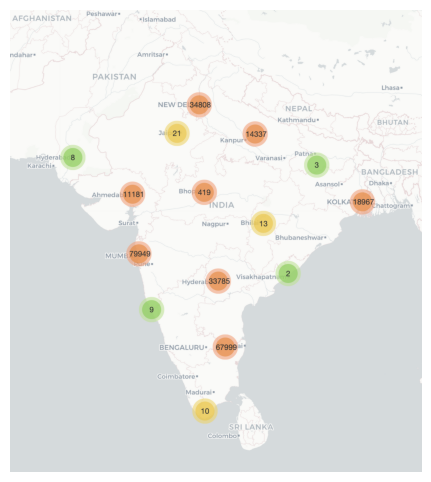

In [ ]:
# Initialize Folium figure and map
f = folium.Figure(width=1000, height=1000)
m = folium.Map(
    width=1000, height=1000,
    location=[20.5937, 78.9629],  # Center on India
    zoom_start=5,
    tiles='CartoDB positron'
).add_to(f)

# Add a cluster for markers
marker_cluster = MarkerCluster(name='Listings').add_to(m)

# Add each listing as a circle marker via apply
df[['Latitude', 'Longitude', 'Property_type']].dropna().apply(
    lambda row: folium.Circle(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Type: {row['Property_type']}"
    ).add_to(marker_cluster),
    axis=1
)

# Display map
#m

#The interactive map can be seen in colab notebook - https://colab.research.google.com/drive/1jFbKumm91MGrxLdY2bybG0XsObyo3nOa#scrollTo=tTchPL6zlT1e
#Displaying snapshot of the visualization since the file was too big to upload to gradescope
from PIL import Image
import matplotlib.pyplot as plt

# Load the image from drive
image_path = '/content/drive/MyDrive/Big Data Analytics/Big Data Analysis Project /Folium map 2.png'
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


**The interactive map can be seen in colab notebook - https://colab.research.google.com/drive/1jFbKumm91MGrxLdY2bybG0XsObyo3nOa#scrollTo=tTchPL6zlT1e**

Observation:

**Metro dominance:**

Mumbai (approx. 80 k) and Bengaluru (approx. 68 k) lead by a wide margin, illustrating the sheer scale of their markets.

Delhi (approx. 35 k) and Hyderabad (approx. 34 k) follow as the next biggest hubs.

**Strong regional players:**

Kolkata (approx. 19 k) and Ahmedabad (approx. 11 k) each host a substantial number of listings, showing broad geographic spread beyond the south and west.

**Sparse coverage outside major cities:**

Coastal and eastern cities like Visakhapatnam (approx. 2) and Patna (approx. 3) show minimal listings, indicating relatively undeveloped or under-represented portals in those areas.

Overall, the map highlights that most of the dataset concentrates in the top six metros, with the rest of India’s urban centers contributing far smaller inventories.

The below map is a heatmap of the price concentration for all locations in India in the listing.

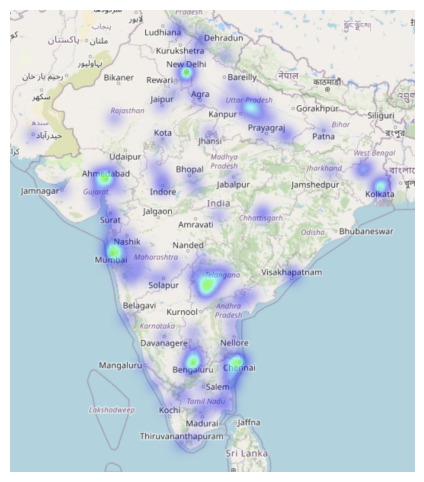

In [ ]:
# Prepare weighted heat data
heat_df = df[['Latitude', 'Longitude', 'Price']].dropna().copy()
max_price = heat_df['Price'].max()
# Normalize price to [0, 1] for heat intensity
heat_df['weight'] = heat_df['Price'] / max_price
heat_data = heat_df[['Latitude', 'Longitude', 'weight']].values.tolist()

# Create Folium map centered on India
india_center = [20.5937, 78.9629]
m = folium.Map(location=india_center, zoom_start=5)

# Add weighted HeatMap layer
HeatMap(
    data=heat_data,
    radius=8,
    blur=15,
    max_zoom=1
).add_to(m)

# Display the map
# m

#The interactive map can be seen in colab notebook - https://colab.research.google.com/drive/1jFbKumm91MGrxLdY2bybG0XsObyo3nOa#scrollTo=EFGME2fblWDI
#Displaying snapshot of the visualization since the file was too big to upload to gradescope
from PIL import Image
import matplotlib.pyplot as plt

# Load the image from drive
image_path = '/content/drive/MyDrive/Big Data Analytics/Big Data Analysis Project /Folium Map 1.png'
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


**The interactive map can be seen in colab notebook - https://colab.research.google.com/drive/1jFbKumm91MGrxLdY2bybG0XsObyo3nOa#scrollTo=EFGME2fblWDI**

Weighted by price, the heatmap highlights India’s most expensive real‐estate clusters:

**Delhi NCR** stands out brightest—indicating a concentration of very high‐value listings around New Delhi, Gurgaon, and Noida.

**Bengaluru** shows the next strongest hotspot, reflecting premium tech‐hub neighborhoods like Whitefield and Koramangala.

**Hyderabad** also lights up significantly, driven by high‐end zones.

**Mumbai** has intensity that diffuses along the western coast.

**Chennai** and **Kolkata** register milder glows—indicating fewer ultra‐high‐value listings compared to the top metros.

The rest of the country shows sparse and low‐intensity coverage. It can be seen that India’s priciest properties are clustered in its six major urban hubs.

## 3.6 Correlation Heatmap of Numerical Features

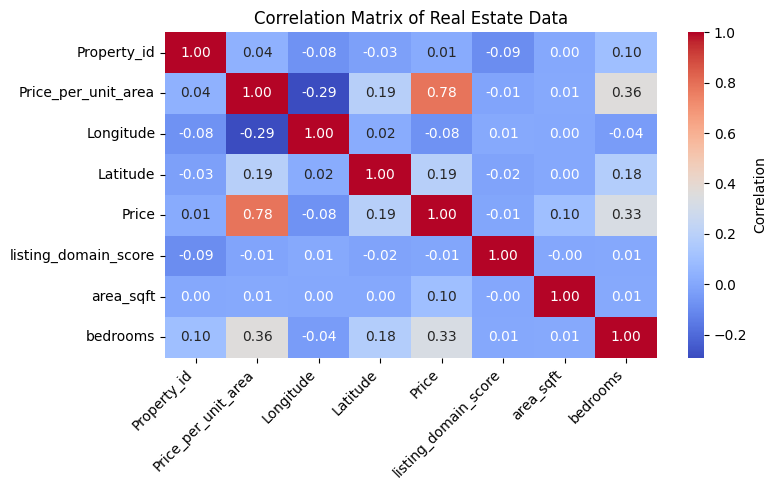

In [ ]:
# Select only numeric columns
numeric_features = df.select_dtypes(include='number').columns

# Compute correlation matrix on those columns
corr = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Matrix of Real Estate Data")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Price and Price_per_unit_area (0.78): Very strong positive correlation - higher per-sqft rates almost always mean higher total prices.

Bedrooms: Moderate correlation with both Price_per_unit_area (0.36) and Price (0.33), reflecting that larger homes tend to cost more both per square foot and in total.

area_sqft (0.10): Only a weak direct link to Price, suggesting size alone isn’t the primary driver of total value.

listing_domain_score, Latitude, Longitude: Near-zero correlations with Price, indicating minimal linear impact.

Because Price_per_unit_area overlaps so heavily with Price, we’ve removed it from the final feature set after hypothesis testing.

# Part 4: Hypothesis Testing

In [ ]:
# Do furnished properties have significantly higher prices than unfurnished ones?
# Hypothesis:
# H0: Furnished and unfurnished properties have the same average price.
# H1: Furnished properties have different (likely higher) average prices.

furnished_prices = df[df['is_furnished'] == 'Furnished']['Price']
unfurnished_prices = df[df['is_furnished'] == 'Unfurnished']['Price']

ttest_ind(furnished_prices, unfurnished_prices)

TtestResult(statistic=np.float64(12.883150015585725), pvalue=np.float64(5.804501965544933e-38), df=np.float64(194434.0))

The above code investigates whether furnished properties are priced differently from unfurnished ones. It separates the dataset into two groups based on furnishing status and compares their average prices using a two-sample t-test. The result gives a t-statistic of 12.88 and a p-value of 0.0, indicating that the difference in price is highly statistically significant.

In simple terms, this means furnished homes tend to be more expensive than unfurnished ones. This finding aligns with expectations — furnishing adds value, convenience, and immediate usability, which buyers or renters are often willing to pay more for.

So, we can conclude that furnishing status plays an important role in pricing, and it should be considered when building a model to predict property prices.

In [ ]:
# Is the price per square foot different between cities (e.g., Mumbai vs Bangalore)?
# Hypothesis:
# H0: Price per sqft is the same across cities.
# H1: At least one city has a different average price per sqft.

df['price_per_sqft'] = df['Price'] / df['area_sqft']

# Example for Mumbai vs Bangalore
mumbai_pps = df[df['City_name'].str.lower() == 'mumbai']['price_per_sqft']
bangalore_pps = df[df['City_name'].str.lower() == 'bangalore']['price_per_sqft']

ttest_ind(mumbai_pps, bangalore_pps)

TtestResult(statistic=np.float64(133.3448542691453), pvalue=np.float64(0.0), df=np.float64(112747.0))

The above code compares the average price per square foot of properties in Mumbai and Bangalore to see if there's a meaningful difference. After calculating the price per sqft, a statistical test was used, which produced a very large t-value (133.34) and a p-value of 0.0. This means the difference between the two cities is highly significant and not due to random chance.

In everyday terms, this result tells us that Mumbai properties cost much more per square foot than those in Bangalore — which is expected. Mumbai is India's commercial capital, where space is limited and demand is extremely high. Bangalore, while also a major city, tends to offer more spacious properties at comparatively lower rates.

This confirms that location (city) is a major factor in determining property prices, and any predictive model should include the city as a key input.

In [ ]:
# Since price per sqft is derived from columns price and area_sqft, so it is redundant, hence it is dropped
df.drop(columns=['price_per_sqft'], inplace = True)

In [ ]:
# If feature is Categorical (e.g., City_name, Locality_grp)
# Hypothesis:
# H0: Average prices across all cities are equal.
# H1: At least one city has different average price.

groups = [g['Price'] for _, g in df.groupby('City_name')]
f_oneway(*groups)

F_onewayResult(statistic=np.float64(3391.6634817424037), pvalue=np.float64(0.0))

The above code checks whether average property prices differ across cities. It groups the dataset by City_name, collects the price values for each city, and runs a statistical test called ANOVA (Analysis of Variance) to compare the group means. The result shows a very high F-statistic (3391.66) and a p-value of 0.0, meaning the differences between cities are highly significant and not due to chance.

In everyday terms, this means that property prices vary a lot from city to city — which is expected. For instance, prices in Mumbai or Delhi are typically much higher than in cities like Ahmedabad or Jaipur due to differences in demand, land value, infrastructure, and local economy.

This confirms that city is a key factor influencing property prices, and it must be included as an important feature in any housing price prediction model. Ignoring it would result in inaccurate estimates that overlook location-based pricing patterns.

In [ ]:
# Is there a difference in listing prices between RERA registered vs non-RERA properties?
# Hypothesis:
# H0: There is not difference between RERA registered and non-RERA registered properties.
# H1: There is a significant difference between RERA registered and non-RERA registered properties.

rera_registered = df[df['is_RERA_registered'] == True]['Price']
nonrera_registered = df[df['is_RERA_registered'] == False]['Price']

ttest_ind(rera_registered, nonrera_registered)

TtestResult(statistic=np.float64(-25.087739658749996), pvalue=np.float64(9.890066008943225e-139), df=np.float64(261510.0))

The above code tests whether there's a difference in average listing prices between properties that are RERA registered and those that are not. It separates the dataset into two groups based on the is_RERA_registered flag and performs a two-sample t-test to compare their mean prices. The result yields a t-statistic of -25.09 and a p-value close to zero (≈ 9.89e-139), indicating the difference is extremely statistically significant.

In simpler terms, this means that RERA-registered and non-RERA-registered properties have significantly different average prices—and that this difference is not due to random chance. The negative t-value indicates that non-RERA properties tend to have higher average prices than RERA-registered ones in this dataset.

While RERA registration is designed to increase transparency, accountability, and buyer confidence, it does not necessarily imply a higher property price. In fact, this result can be explained by several factors. RERA typically applies to newer developments, which may be located in emerging or less central areas and are often priced competitively to attract buyers. Meanwhile, many non-RERA properties may be older, located in established or premium neighborhoods, or fall outside the scope of the regulation, thus commanding higher prices. Additionally, developers under RERA are bound by stricter regulations and pricing transparency, which could reduce inflated pricing practices. Therefore, the observed price difference is consistent with the structural and market characteristics of RERA versus non-RERA properties.

In [ ]:
# Is there a difference in listing prices between studio apartments and 1BHK apartments?
# Hypothesis:
# H0: There is no significant difference between studio and 1BHK apartment prices.
# H1: There is a significant difference between studio and 1BHK apartment prices.

one_bhk = df[df['bedrooms'] == 1]['Price']
studio = df[df['bedrooms'] == 0]['Price']

ttest_ind(studio, one_bhk)

TtestResult(statistic=np.float64(10.413794896499136), pvalue=np.float64(2.2146233946881334e-25), df=np.float64(93621.0))

The above code compares the average listing prices of studio apartments (0 bedrooms) and 1BHK apartments (1 bedroom) to see if there’s a meaningful difference. After splitting the dataset into two groups, it runs a two-sample t-test. The test result shows a t-statistic of 10.41 and a p-value close to zero (~2.2e-25), which is far below the typical threshold of 0.05.

This means the difference in prices is highly statistically significant, and we can confidently reject the null hypothesis. In simple terms, 1BHK apartments are priced significantly higher than studio apartments. This makes intuitive sense — 1BHKs offer more space and functionality, making them more desirable in most markets.

In [ ]:
# Is there a difference in listing prices between Penthouse and non-Penthouse apartments?
# Hypothesis:
# H0: There is no significant difference between Penthouse and non-Penthouse apartment apartment prices.
# H1: There is a significant difference between Penthouse and non-Penthouse apartment apartment prices.

penthouse = df[df['is_PentaHouse'] == True]['Price']
non_penthouse = df[df['is_PentaHouse'] == False]['Price']

ttest_ind(penthouse, non_penthouse)

TtestResult(statistic=np.float64(37.905559885697656), pvalue=np.float64(0.0), df=np.float64(261510.0))

The above code investigates whether penthouse apartments are priced significantly differently from non-penthouse apartments. It separates the dataset based on the `is_PentaHouse` column and uses a two-sample t-test to compare the average prices of the two groups. The test result yields a t-statistic of 37.91 and a p-value of 0.0, indicating an extremely significant difference.

In plain terms, this means penthouses are priced much higher than regular apartments, and the difference is not due to chance. This aligns with real estate expectations — penthouses are typically luxury units with better views, more space, and premium features, which naturally command higher prices.

The takeaway is that apartment type matters greatly in property pricing. Whether or not a listing is a penthouse should absolutely be included as a feature when building models to predict property value.

# Part 5: Feature Engineering

As our first step of feature engineering, we initially considered removing the top and bottom 1% of listings based on price and area (in square feet) to eliminate extreme outliers. This would have removed around 6,000 rows from the dataset—mostly properties that are either unusually expensive, very cheap, extremely large, or very small. However, when we examined these outliers more closely, we found that many of the high-priced, large-area properties are luxury homes located in upscale neighborhoods. These are likely owned by high-profile individuals such as celebrities or politicians. While these properties are far above the average (with prices around ₹100 crore or more), they are still valid and relevant listings in the housing market.

When we excluded these outlier properties and trained our models, we observed a noticeable performance improvement—particularly for the Linear Regression model. Its R² score improved significantly from 24% to 54%, which makes sense, as linear models can be heavily influenced by extreme values and may struggle to fit the rest of the data accurately when such points are present. Removing the outliers helped the model better capture the general trend in the data.

On the other hand, tree-based models like Random Forest and XGBoost were much less affected by the presence of outliers. Their performance dropped only slightly: Random Forest's R² score decreased from 90% to 88%, and XGBoost's from 89% to 88%.

Despite the slight performance boost from removing outliers, we believe it's not the right approach. These luxury properties are real, valid entries in the housing market, and excluding them would mean ignoring an important segment of the data. Instead, we want our models to be robust and capable of making accurate predictions for both regular and high-end properties. Therefore, we made a conscious decision to retain all listings, including the extreme ones.

In [ ]:
# Top 5 rows with the highest Price
pd.set_option('display.max_columns', None)

top5_price = df.sort_values(by='Price', ascending=False).head(5)

# Top 5 rows with the largest area_sqft
top5_area = df.sort_values(by='area_sqft', ascending=False).head(5)

# Display results
print("Top 5 Most Expensive Properties:")
display(top5_price)

print("\nTop 5 Largest Properties by Area:")
display(top5_area)

Top 5 Most Expensive Properties:


,Property_id,Property_type,Price_per_unit_area,Property_building_status,City_name,Locality_Name,Longitude,Latitude,Price,Sub_urban_name,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,area_sqft,bedrooms
252653,13502172,Independent Floor,49999,UNVERIFIED,Mumbai,Cuffe Parade,72.820534,18.914450,999999999.0,Mumbai South,Unfurnished,4.0,False,False,False,True,False,False,False,20000.0,15
108771,14009894,Residential Plot,2295,UNVERIFIED,Delhi,Kasturba Gandhi Marg,77.225418,28.622810,999999999.0,Delhi Central,Unfurnished,4.0,True,False,False,True,False,False,False,435600.0,0
9407,15373683,Residential Plot,46453,UNVERIFIED,Ahmedabad,Shilaj,72.460732,23.059677,999999999.0,Ahmedabad West,Unfurnished,4.0,True,False,False,False,False,False,False,21528.0,0
261359,12268909,Villa,153350,UNVERIFIED,Mumbai,Marine Lines,72.827179,18.943541,999999999.0,Mumbai South,Unfurnished,4.0,False,False,False,True,False,False,False,6521.0,5
261351,12338115,Independent House,153334,UNVERIFIED,Mumbai,Marine Lines,72.827179,18.943541,999895594.0,Mumbai South,Unfurnished,4.0,False,False,False,True,False,False,False,6521.0,5



Top 5 Largest Properties by Area:


,Property_id,Property_type,Price_per_unit_area,Property_building_status,City_name,Locality_Name,Longitude,Latitude,Price,Sub_urban_name,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,area_sqft,bedrooms
10105,15073919,Residential Plot,113,UNVERIFIED,Ahmedabad,Bhadaj,72.484024,23.087114,990000000.0,Ahmedabad West,Unfurnished,4.0,True,False,False,False,False,False,False,8712000.0,0
34369,15559245,Residential Plot,102,UNVERIFIED,Bangalore,Anekal City,77.696251,12.722342,400000000.0,Bangalore South,Unfurnished,4.0,True,False,False,False,False,False,False,3920400.0,0
37043,12343291,Residential Plot,137,UNVERIFIED,Bangalore,Bengaluru Kanakapura Road,77.491058,12.769907,420000000.0,Other,Unfurnished,4.0,True,False,False,False,False,False,False,3049200.0,0
168523,15581466,Residential Plot,366,UNVERIFIED,Lucknow,Kanpur Lucknow Road,80.889084,26.789402,800000000.0,Other,Unfurnished,4.0,True,False,False,True,False,False,False,2181501.0,0
139237,15223341,Residential Plot,143,UNVERIFIED,Hyderabad,Gopanpally,78.300957,17.451654,250000000.0,Hyderabad West,Unfurnished,4.0,True,False,False,False,False,False,False,1745201.0,0


In [ ]:
#Outlier filtering (1st–99th percentile)
# q1_price = df['Price'].quantile(0.01)
# q99_price = df['Price'].quantile(0.99)
# q1_area  = df['area_sqft'].quantile(0.01)
# q99_area = df['area_sqft'].quantile(0.99)

# df = df[
#     (df['Price'] >= q1_price) &
#     (df['Price'] <= q99_price) &
#     (df['area_sqft']        >= q1_area)  &
#     (df['area_sqft']        <= q99_area)
# ]

Next, we check for cross-field consistency between the `Price`, `area_sqft`, and `Price_per_unit_area` columns. In a logically consistent listing, the total price should be approximately equal to `Price_per_unit_area` × `area_sqft`. We only keep rows where the actual price is within 50% above or below the calculated price (i.e., between 0.5× and 1.5×). This step helps filter out data entry errors or unrealistic values, such as typos or inconsistencies across columns.

In [ ]:
#Cross-field consistency: keep only if Price ≈ Price_per_unit_area × area_sqft
df['price_calc'] = df['Price_per_unit_area'] * df['area_sqft']
df['price_ratio'] = df['Price'] / df['price_calc']

df = df[(df['price_ratio'] >= 0.5) & (df['price_ratio'] <= 1.5)]
df.drop(columns=['price_calc', 'price_ratio', 'Price_per_unit_area'], inplace=True)

<ipython-input-33-750f672917a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['price_calc', 'price_ratio', 'Price_per_unit_area'], inplace=True)


In the following step, we identify approximately 4,900 unique locality values across various cities in the dataset, presenting a high-cardinality challenge. Encoding this feature directly—such as with one-hot encoding—would create around 4,900 additional columns, resulting in an overly complex and sparse feature space that increases the risk of overfitting and slows down model training. To address this, we group all rare localities—those appearing three times or fewer—into a single category labeled "Other." These infrequent localities offer limited predictive value due to their minimal representation and are more likely to introduce noise than meaningful patterns. Consolidating them reduces dimensionality, enhances model robustness, and supports better generalization to new or unseen data.

In [ ]:
print(df['Locality_Name'].value_counts())

rare_localities = df['Locality_Name'].value_counts()[df['Locality_Name'].value_counts() <= 3].index
print(rare_localities)

Locality_Name
Mira Road East         8403
Thane West             7887
Dombivali              2822
New Town               2667
Kharghar               2590
                       ... 
Old Nasheman Colony       1
Vikramgad                 1
Rabale Station Road       1
Thane Bhiwandi Road       1
Rajaram Nagar             1
Name: count, Length: 5046, dtype: int64
Index(['Ananda Nagar', 'J B Nagar', 'Dandupalya', 'hebbagodi', 'Guddadahalli',
       'Pokhran Road No 2', 'Haldirams', 'Chandivali', 'Devidas Cross Lane',
       'Yogidham',
       ...
       'Mumbai Pune Expressway', 'MULUND COLONY', 'Satpati', 'Kelve',
       'Bhakti Park Wadala East', 'Old Nasheman Colony', 'Vikramgad',
       'Rabale Station Road', 'Thane Bhiwandi Road', 'Rajaram Nagar'],
      dtype='object', name='Locality_Name', length=2420)


In [ ]:
df.nunique()

,0
Property_id,207275
Property_type,5
Property_building_status,3
City_name,8
Locality_Name,5046
Longitude,45108
Latitude,49827
Price,49459
Sub_urban_name,101
is_furnished,3


Similar to the `Locality_Name` column, we identify rare `Sub_urban_name` as those that appear fewer than 4 times in the dataset and group them into a single category labeled "Other" to reduce sparsity and noise.

We then apply frequency encoding to both the `Locality_Name` and `Sub_urban_name` columns. When a categorical feature contains more than 15–20 unique values, one-hot encoding becomes inefficient due to the high dimensionality it introduces. In contrast, frequency encoding provides a compact representation and is particularly well-suited for tree-based models like XGBoost and Random Forest, which can effectively leverage the encoded frequencies without assuming any ordinal relationship.

In [ ]:
#For Localities
valid_localities = df['Locality_Name'].value_counts()[df['Locality_Name'].value_counts() >= 3].index
df['Locality_Name'] = df['Locality_Name'].apply(lambda x: x if x in valid_localities else 'Other')

# For Sub_urban_name
valid_suburbs = df['Sub_urban_name'].value_counts()[df['Sub_urban_name'].value_counts() >= 3].index
df['Sub_urban_name'] = df['Sub_urban_name'].apply(lambda x: x if x in valid_suburbs else 'Other')

# Frequency Encoding

# Frequency encode Locality_Name_Grouped
locality_freq = df['Locality_Name'].value_counts(normalize=True)
df['Locality_Name_encoded'] = df['Locality_Name'].map(locality_freq)

# Frequency encode Sub_urban_name_Grouped
suburb_freq = df['Sub_urban_name'].value_counts(normalize=True)
df['Sub_urban_name_encoded'] = df['Sub_urban_name'].map(suburb_freq)


One Hot Encoding is done on columns which have less than 10 unique values.

In [ ]:
# One Hot Encoding
categorical_features = ['Property_type', 'Property_building_status', 'is_furnished','City_name']

df = pd.get_dummies(
    df,
    columns=categorical_features,
    drop_first=False,
    dtype=int
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261424 entries, 0 to 261511
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Property_id                          261424 non-null  int64  
 1   Locality_Name                        261424 non-null  object 
 2   Longitude                            261424 non-null  float64
 3   Latitude                             261424 non-null  float64
 4   Price                                261424 non-null  float64
 5   Sub_urban_name                       261424 non-null  object 
 6   listing_domain_score                 261424 non-null  float64
 7   is_plot                              261424 non-null  bool   
 8   is_RERA_registered                   261424 non-null  bool   
 9   is_Apartment                         261424 non-null  bool   
 10  is_ready_to_move                     261424 non-null  bool   
 11  is_commercial_List

In [ ]:
# Dropping the categorical columns which have been encoded
df.drop(columns=['Locality_Name','Sub_urban_name'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261424 entries, 0 to 261423
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Property_id                          261424 non-null  int64  
 1   Longitude                            261424 non-null  float64
 2   Latitude                             261424 non-null  float64
 3   Price                                261424 non-null  float64
 4   listing_domain_score                 261424 non-null  float64
 5   is_plot                              261424 non-null  bool   
 6   is_RERA_registered                   261424 non-null  bool   
 7   is_Apartment                         261424 non-null  bool   
 8   is_ready_to_move                     261424 non-null  bool   
 9   is_commercial_Listing                261424 non-null  bool   
 10  is_PentaHouse                        261424 non-null  bool   
 11  is_studio    

In [ ]:
df.tail()

,Property_id,Longitude,Latitude,Price,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,area_sqft,bedrooms,Locality_Name_encoded,Sub_urban_name_encoded,Property_type_Apartment,Property_type_Independent Floor,Property_type_Independent House,Property_type_Residential Plot,Property_type_Villa,Property_building_status_ACTIVE,Property_building_status_INACTIVE,Property_building_status_UNVERIFIED,is_furnished_Furnished,is_furnished_Semi-Furnished,is_furnished_Unfurnished,City_name_Ahmedabad,City_name_Bangalore,City_name_Chennai,City_name_Delhi,City_name_Hyderabad,City_name_Kolkata,City_name_Lucknow,City_name_Mumbai
261419,10324765,72.863739,19.421352,3400000.0,4.0,False,True,True,False,False,False,False,346.0,1,0.002406,0.051889,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
261420,15076701,72.863739,19.421352,3650000.0,4.0,False,True,True,False,False,False,False,426.0,1,0.002406,0.051889,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
261421,10324762,72.863739,19.421352,3550000.0,4.0,False,True,True,False,False,False,False,360.0,1,0.002406,0.051889,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
261422,15076700,72.863739,19.421352,5200000.0,4.0,False,True,True,False,False,False,False,590.0,2,0.002406,0.051889,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
261423,14683740,72.863739,19.421352,3529577.0,4.0,False,True,True,False,False,False,False,358.0,1,0.002406,0.051889,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


# Part 6: Modeling


In this section, we train multiple models to predict real estate prices, starting with Linear Regression as a baseline. We then use more powerful tree-based models—Random Forest and XGBoost—to capture non-linear relationships. Each model is evaluated using MAE, RMSE, and R² on the test set, along with visualizations of predicted vs actual prices and residuals.

## 6.1 Linear Regression

We begin with Linear Regression as our baseline model due to its simplicity, interpretability, and efficiency. It assumes a linear relationship between the features and the target variable, making it a good starting point to understand how well the data can be explained using basic patterns. While it may not capture complex interactions, it provides a useful benchmark to compare with more advanced models later.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Features and Target
X = df.drop(columns=['Price', 'Property_id'])  # Inputs
y = df['Price']                                # Target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

# 4. Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 5. Evaluation
print("Train Set Performance:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Set Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")



Train Set Performance:
MAE: 18069083.25
RMSE: 43729213.28
R²: 0.2793

Test Set Performance:
MAE: 18129342.28
RMSE: 44465715.91
R²: 0.2644


In [ ]:
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred
})

# Display the first few rows
print(comparison_df.head(20))


    Actual Price  Predicted Price
0      5100000.0    -1.412794e+07
1     12800000.0     5.072348e+06
2      3960000.0     6.656155e+06
3      3840000.0     1.154725e+07
4      3396750.0    -5.721559e+06
5      9000000.0    -1.879545e+06
6     17600000.0     2.597482e+07
7      2599800.0     4.673788e+06
8      8100000.0    -9.973189e+06
9      8600000.0    -1.722143e+07
10    14000000.0     6.386819e+06
11     2500000.0    -1.374331e+07
12    12000000.0     5.695786e+06
13     7500000.0     5.897565e+07
14    53000000.0     8.075209e+07
15    11000000.0     2.466399e+07
16     3000000.0     9.224700e+06
17    12380000.0     4.395688e+07
18    18000000.0     5.048300e+07
19     5136612.0     4.059594e+06


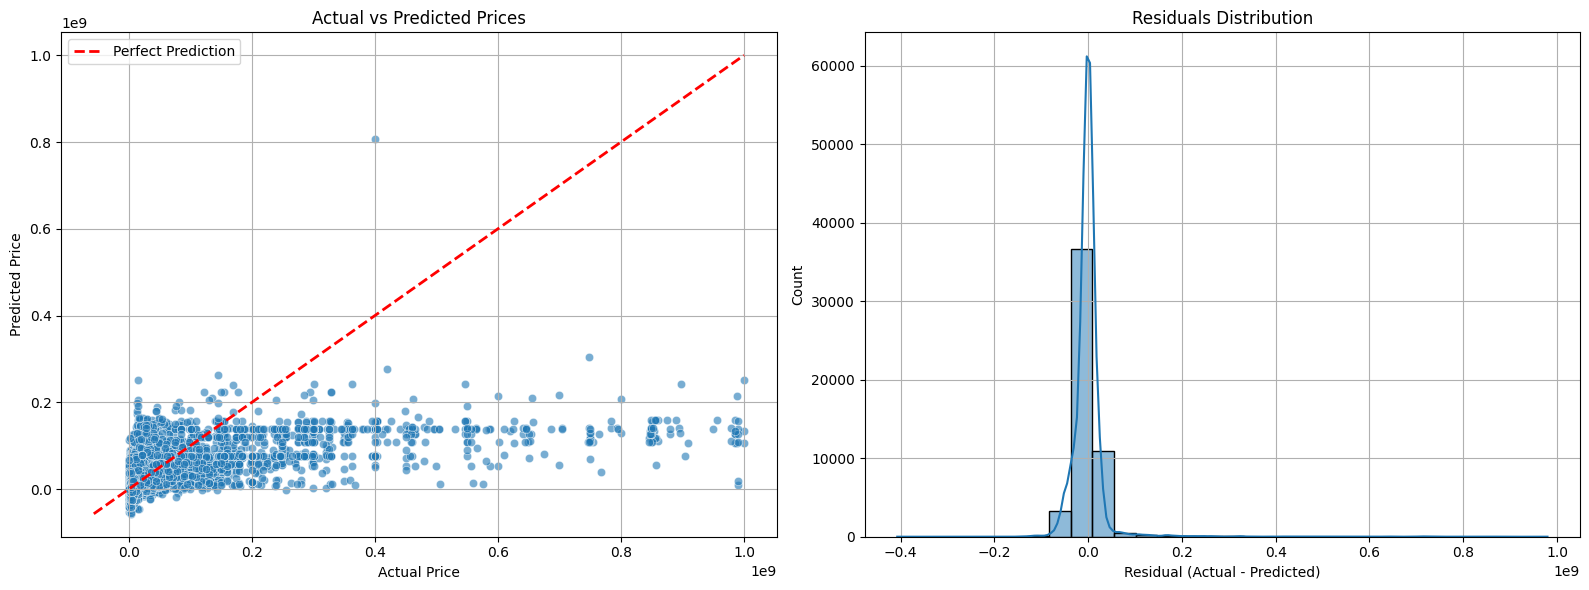

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Actual vs Predicted Scatter Plot
sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[0], alpha=0.6)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Actual vs Predicted Prices")
axes[0].legend()
axes[0].grid(True)

# 2. Residuals Distribution
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True, bins=30, ax=axes[1])
axes[1].set_title("Residuals Distribution")
axes[1].set_xlabel("Residual (Actual - Predicted)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance based on Linear Regression Coefficients
coefficients = lr.coef_
feature_names = X.columns
importance_df_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df_lr['Absolute Coefficient'] = importance_df_lr['Coefficient'].abs()
importance_df_lr = importance_df_lr.sort_values(by='Absolute Coefficient', ascending=False)

# Display Top 10 features
print(importance_df_lr.head(10))


                            Feature   Coefficient  Absolute Coefficient
12            Locality_Name_encoded -2.559332e+08          2.559332e+08
8                     is_PentaHouse  1.314617e+08          1.314617e+08
13           Sub_urban_name_encoded -4.689331e+07          4.689331e+07
28                  City_name_Delhi  3.670484e+07          3.670484e+07
15  Property_type_Independent Floor -3.374684e+07          3.374684e+07
18              Property_type_Villa  2.895150e+07          2.895150e+07
11                         bedrooms  1.773788e+07          1.773788e+07
32                 City_name_Mumbai  1.736889e+07          1.736889e+07
31                City_name_Lucknow -1.500815e+07          1.500815e+07
17   Property_type_Residential Plot  1.348057e+07          1.348057e+07


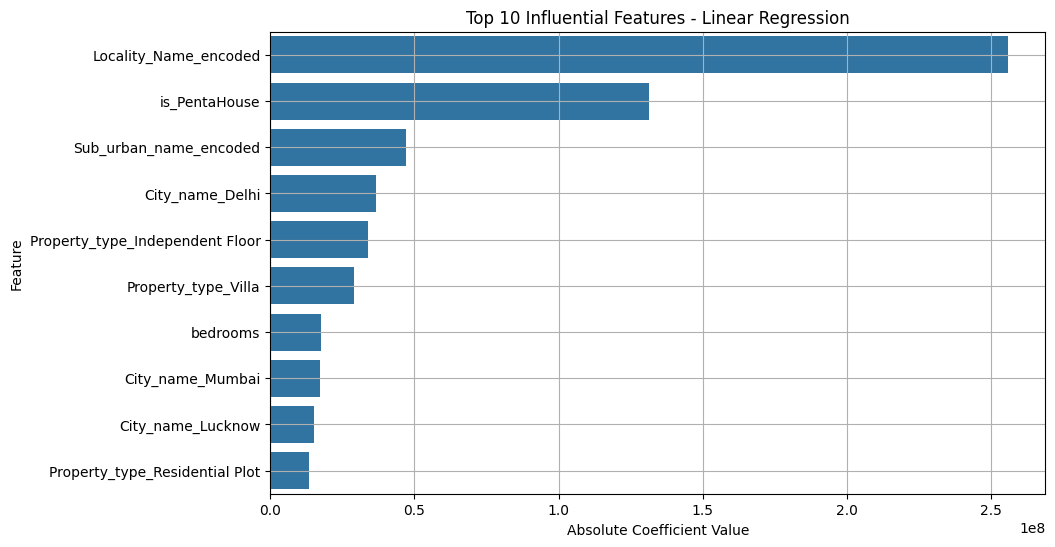

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=importance_df_lr.head(10))
plt.title('Top 10 Influential Features - Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()



1.   **Performance Metrics**
    
    Train R²: 0.2793

    Test R²: 0.2644
    The model explains only ~26% of the variance in property prices on unseen data, indicating weak predictive power.

    Train RMSE: ₹43,729,213

    Test RMSE: ₹44,465,716
    The model's average error magnitude is over ₹4 crore, which is quite large relative to typical property values.

    Train MAE: ₹18,069,083

    Test MAE: ₹18,129,342
    The average absolute prediction error is also high, suggesting poor accuracy.

2.   **Prediction Output**

    Some predictions are negative, which is not meaningful in the context of real estate pricing.
    This is a limitation of linear regression, as it doesn't constrain outputs to realistic ranges.

3. **Scatter Plot Insights**

    The scatter plot of Actual vs Predicted shows a large spread with many points below the 45 degree line, especially for higher actual prices.  
    The model underestimates high-priced properties and shows poor alignment with the perfect prediction line.

4. **Residual Distribution**

    The residuals are tightly concentrated around zero, but with long tails, indicating the presence of large individual errors.
    This suggests the model performs inconsistently across different price segments.

5. **Feature Importance - Top Coefficients**

    Top positive drivers:

    is_PentaHouse, City_name_Delhi, Property_type_Villa

    These features are associated with higher predicted prices.

    Top negative drivers:

    Locality_Name_encoded, Sub_urban_name_encoded, Property_type_Independent Floor

    These are associated with lower predicted prices, possibly due to location or lower demand.

    The coefficients are interpretable, which is a strength of linear regression. However, the model may be too simplistic for complex real estate data.


**Conclusion:**

Linear Regression provides a simple, interpretable baseline, but its low R² score, unrealistic outputs (negative prices), and poor performance on both training and test sets suggest that it is not suitable as a final model.



## 6.2 Hyperparameter tuning Linear regression

To improve the performance of our linear model and reduce overfitting, we use Ridge Regression, which adds L2 regularization to penalize large coefficients. We tune the regularization strength (alpha) by splitting the training data into a smaller training set and a validation set. Multiple values of alpha are tested, and the one that gives the highest R² score on the validation set is selected as the best. This approach ensures that the model generalizes better to unseen data while maintaining interpretability.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Step 1: Split train → train + validation
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Try different alphas
best_r2 = -np.inf
best_alpha = None
best_model = None

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_full, y_train_full)

    y_val_pred = ridge.predict(X_val)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f"alpha={alpha} --> Validation R²: {val_r2:.4f}")

    if val_r2 > best_r2:
        best_r2 = val_r2
        best_alpha = alpha
        best_model = ridge

print("\nBest alpha:", best_alpha)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.749e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


alpha=0.01 --> Validation R²: 0.2841
alpha=0.1 --> Validation R²: 0.2841
alpha=1 --> Validation R²: 0.2842
alpha=10 --> Validation R²: 0.2844
alpha=100 --> Validation R²: 0.2846

Best alpha: 100


In [ ]:
# Combine train + validation
X_final_train = pd.concat([X_train_full, X_val])
y_final_train = pd.concat([y_train_full, y_val])

# Retrain final model
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_final_train, y_final_train)

# Predict on test set
y_test_pred = final_ridge.predict(X_test)

# Evaluate
print("\nFinal Ridge Regression on Test Set:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")



Final Ridge Regression on Test Set:
MAE: 18060387.88
RMSE: 44536863.93
R²: 0.2620


In [ ]:
# Create comparison DataFrame
ridge_comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred
}).round(2)

# Display first 20 rows
print(ridge_comparison_df.head(20))


    Actual Price  Predicted Price
0      5100000.0     -12939873.97
1     12800000.0       3867023.16
2      3960000.0       6387530.40
3      3840000.0      10860822.66
4      3396750.0      -5637967.21
5      9000000.0      -3088837.15
6     17600000.0      25970044.37
7      2599800.0       4489341.67
8      8100000.0      -9799114.81
9      8600000.0     -18143179.25
10    14000000.0       5793815.24
11     2500000.0     -14010217.72
12    12000000.0       3985430.04
13     7500000.0      58431884.56
14    53000000.0      80386084.06
15    11000000.0      24467786.99
16     3000000.0       8834540.19
17    12380000.0      42644125.90
18    18000000.0      49694799.09
19     5136612.0       7427437.98


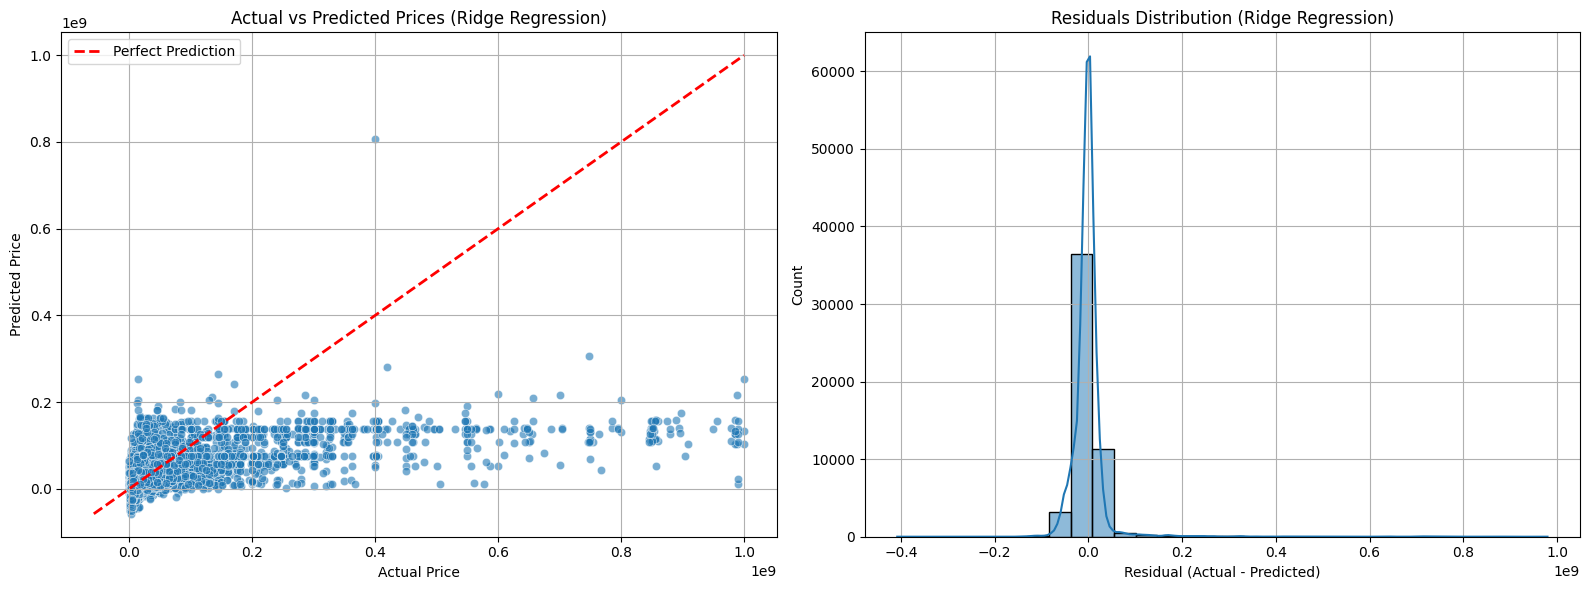

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 plots

# 1. Actual vs Predicted (with 45° line)
sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[0], alpha=0.6)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Actual vs Predicted Prices (Ridge Regression)")
axes[0].legend()
axes[0].grid(True)

# 2. Residuals Distribution
sns.histplot(residuals, kde=True, bins=30, ax=axes[1])
axes[1].set_title("Residuals Distribution (Ridge Regression)")
axes[1].set_xlabel("Residual (Actual - Predicted)")
axes[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# Extract feature importance from Ridge coefficients
ridge_coeffs = final_ridge.coef_
feature_names = X.columns

ridge_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coeffs,
    'Absolute Coefficient': np.abs(ridge_coeffs)
}).sort_values(by='Absolute Coefficient', ascending=False)

# Display top 10
print(ridge_importance_df.head(10))


                            Feature   Coefficient  Absolute Coefficient
8                     is_PentaHouse  6.351005e+07          6.351005e+07
28                  City_name_Delhi  3.429413e+07          3.429413e+07
15  Property_type_Independent Floor -3.337535e+07          3.337535e+07
13           Sub_urban_name_encoded -3.048265e+07          3.048265e+07
18              Property_type_Villa  2.854855e+07          2.854855e+07
12            Locality_Name_encoded -1.999275e+07          1.999275e+07
11                         bedrooms  1.788701e+07          1.788701e+07
31                City_name_Lucknow -1.526732e+07          1.526732e+07
32                 City_name_Mumbai  1.401395e+07          1.401395e+07
17   Property_type_Residential Plot  1.349723e+07          1.349723e+07


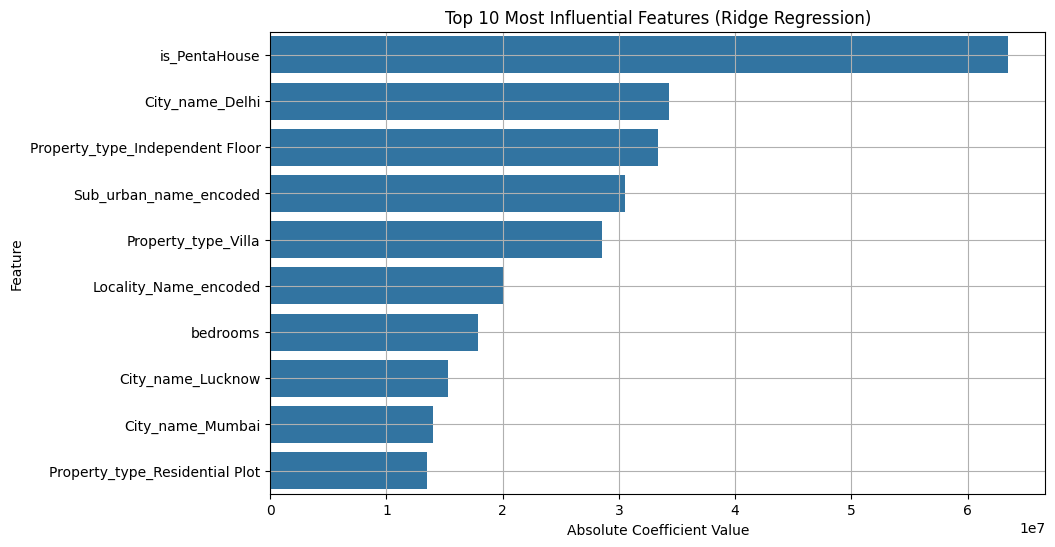

In [ ]:
# Plot top 10 features by absolute coefficient value
plt.figure(figsize=(10,6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=ridge_importance_df.head(10))
plt.title('Top 10 Most Influential Features (Ridge Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()




1.   **Performance Metrics**

    MAE (Mean Absolute Error): ₹1.81 Crore

    RMSE (Root Mean Squared Error): ₹4.45 Crore

    R² Score: 0.2620
    These results are nearly identical to the plain linear regression, suggesting that adding L2 regularization did not significantly improve predictive performance. The model still explains only ~26% of the variance in prices.

2.   **Predicted vs Actual Price**

    Several predicted prices are negative, which is not valid in the context of property pricing.

    The scatter plot shows wide dispersion, and predictions often deviate significantly from the 45 degrees line.
    This indicates that even with regularization, the model struggles with generalization and fails to learn meaningful non-linear relationships in the data.

3. **Residual Analysis**

    The residual distribution is narrow and centered around zero but exhibits long tails.
    This confirms that while the model is relatively stable for moderate-priced properties, it makes very large errors for expensive listings.

4. **Feature Importance**

    Top positive predictors: is_PentaHouse, City_name_Delhi, Property_type_Villa
    These features are strongly associated with higher predicted prices.

    Top negative predictors:
    Sub_urban_name_encoded, Locality_Name_encoded, Property_type_Independent Floor
    These contribute to lower predicted prices, likely due to location or property type influence.

    Features like bedrooms and City_name_Mumbai also show meaningful contribution.

    The regularization shrinks coefficients, but the top influential features remain largely consistent with plain linear regression, reinforcing their impact on price.


**Conclusion:**
Ridge Regression added regularization to prevent overfitting but did not lead to any meaningful performance gain. Predictions remain inaccurate, especially for high-priced properties, and negative outputs persist. While useful for interpretability and coefficient smoothing, Ridge is still not suitable as a final model for this dataset.



## 6.3 Random Forest

We now apply the Random Forest Regressor — an ensemble learning method that builds multiple decision trees and averages their outputs to improve accuracy and reduce overfitting. Unlike linear models, Random Forest can capture complex, non-linear relationships between features, making it suitable for real estate pricing where factors interact in non-obvious ways. With minimal preprocessing and strong generalization ability, Random Forest serves as a robust benchmark for comparison against both simple linear models and more advanced methods like XGBoost.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. Features and Target
X = df.drop(columns=['Price', 'Property_id'])  # Inputs
y = df['Price']                                # Target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Model Training (Random Forest)
rf = RandomForestRegressor(
    n_estimators=100,     # 100 trees
    random_state=42,      # reproducible results
    n_jobs=-1             # use all CPU cores
)
rf.fit(X_train, y_train)

# 4. Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 5. Evaluation
print("Train Set Performance:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Set Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")





Train Set Performance:
MAE: 1686496.38
RMSE: 8946987.25
R²: 0.9698

Test Set Performance:
MAE: 3543135.65
RMSE: 17480100.87
R²: 0.8863


In [ ]:
# Print Actual vs Predicted Table
comparison_rf = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred
}).round(2)
print("\nActual vs Predicted Prices:")
print(comparison_rf.head(20))


Actual vs Predicted Prices:
    Actual Price  Predicted Price
0      5100000.0       6084090.13
1     12800000.0      12660737.06
2      3960000.0       5535046.41
3      3840000.0       4182323.49
4      3396750.0       3410818.01
5      9000000.0      10069878.27
6     17600000.0      15629064.29
7      2599800.0       2292167.96
8      8100000.0      10900091.41
9      8600000.0       8765282.09
10    14000000.0      12774850.00
11     2500000.0       3397040.02
12    12000000.0      11230000.01
13     7500000.0       6801116.67
14    53000000.0      45534543.48
15    11000000.0      16282670.07
16     3000000.0       2835150.00
17    12380000.0      27804256.84
18    18000000.0      15901533.33
19     5136612.0       3997943.89


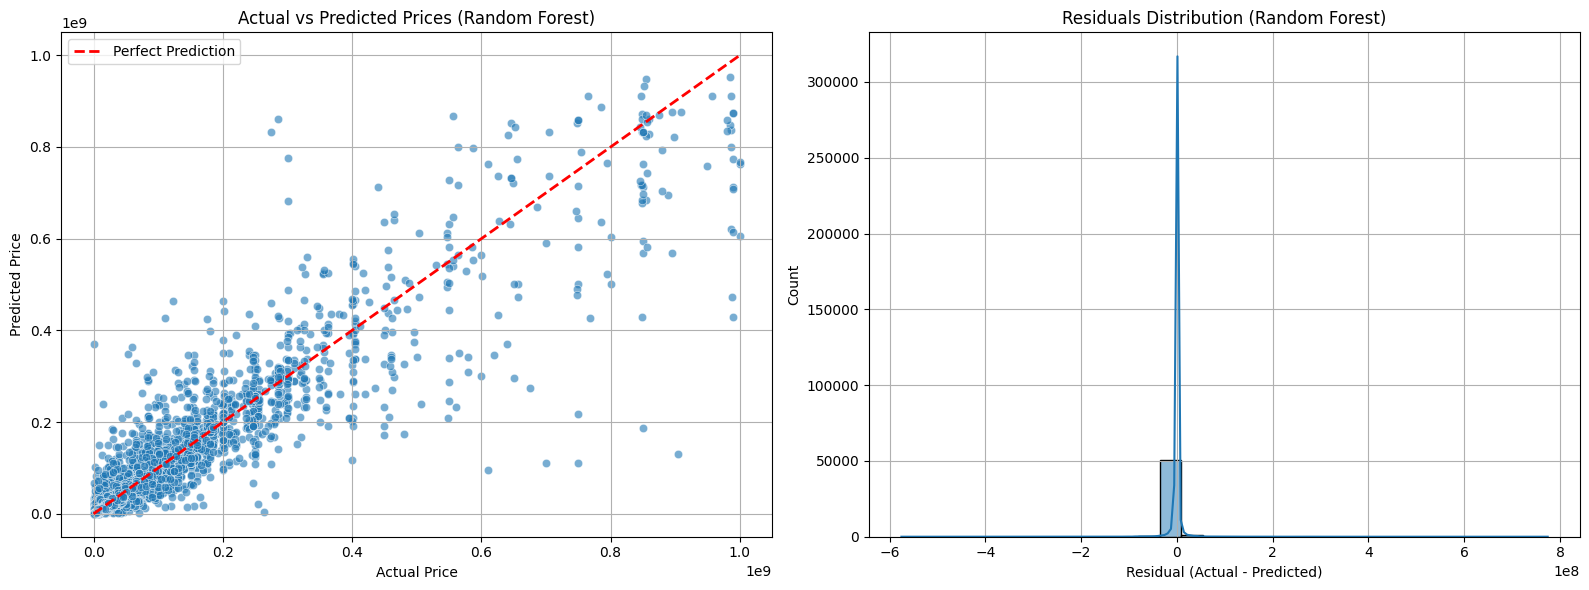

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred

# Set up 1 row × 2 column subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Actual vs Predicted Scatter Plot
sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[0], alpha=0.6)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Actual vs Predicted Prices (Random Forest)")
axes[0].legend()
axes[0].grid(True)

# 2. Residuals Distribution
sns.histplot(residuals, kde=True, bins=30, ax=axes[1])
axes[1].set_title("Residuals Distribution (Random Forest)")
axes[1].set_xlabel("Residual (Actual - Predicted)")
axes[1].grid(True)

# Final layout
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display Top 10 important features
print(importance_df.head(10))


                            Feature  Importance
10                        area_sqft    0.413883
1                          Latitude    0.243464
0                         Longitude    0.092586
15  Property_type_Independent Floor    0.085818
32                 City_name_Mumbai    0.028928
11                         bedrooms    0.026188
13           Sub_urban_name_encoded    0.026141
18              Property_type_Villa    0.024297
12            Locality_Name_encoded    0.018500
24         is_furnished_Unfurnished    0.011186


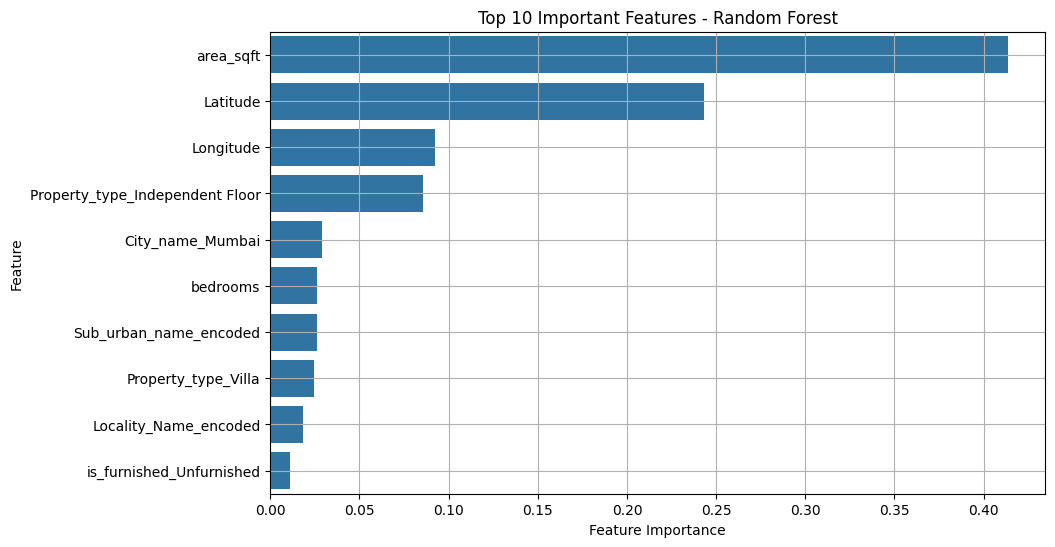

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()



1.   **Performance Metrics**

    MAE (Mean Absolute Error): ₹0.17 Crore (Train), ₹0.35 Crore (Test)

    RMSE (Root Mean Squared Error): ₹0.89 Crore (Train), ₹1.75 Crore (Test)

    R² Score: 0.9698 (Train), 0.8863 (Test)

    These results indicate that Random Forest is significantly more accurate than both Linear and Ridge Regression. It explains nearly **89% of the variance** in the test data, showing strong predictive power with relatively low error values for property pricing.

2.   **Predicted vs Actual Prices**  

    Predicted prices align closely with the actual values, with no negative predictions (unlike linear models).  
    The scatter plot shows tight clustering along the 45 degree reference line
    This reflects the model's ability to learn complex patterns and capture non-linear relationships, especially across a wide range of property values.


3. **Residual Analysis**  

    The residual distribution is tightly centered around zero with minimal skew This indicates **low bias** and good generalization.  
    The model performs consistently across both mid- and high-priced properties, though some variance still exists at the high end. Overall, the error behavior is well controlled.


4. **Feature Importance**

    Top contributing features: area_sqft, Latitude, Longitude, and Property_type_Independent Floor. These features dominate the model's decisions and are consistent with domain expectations (location and size are key price drivers).  
    Features like bedrooms, Sub_urban_name_encoded, and Property_type_Villa also influence predictions, highlighting how Random Forest captures feature interactions beyond just linear trends.

**Conclusion:**  
Random Forest greatly outperforms linear models in terms of accuracy and robustness. It models non-linear relationships effectively and generalizes well to unseen data. While some room for improvement remains at the extremes, Random Forest is highly suitable for this price prediction task and provides **reliable and interpretable** insights into key price drivers.


## 6.4 Hyperparameter tuning Random Forest

To optimize the performance of the Random Forest model, we planned to perform a manual grid search over two key hyperparameters: n_estimators (number of trees in the forest) and max_depth (maximum depth of each tree). The idea was to iterate over different combinations of these parameters—specifically, testing n_estimators values of 100, 200, and 300 with max_depth values of None, 10, 20, and 30.

For each combination, the model would be trained on the training set and evaluated on the validation set using the R² score. The combination yielding the highest validation R² would be selected as the best model.

However, due to the large size of the dataset and the computational cost of training many tree-based models, the loop took an extremely long time to execute and did not finish during our session. As a result, the grid search was commented out and not executed, and we proceeded using the default hyperparameters.

In [ ]:
# #  split into train + temp
# X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# # split temp into validation and test
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# print(f"Train set: {X_train_full.shape}")
# print(f"Validation set: {X_val.shape}")
# print(f"Test set: {X_test.shape}")


In [ ]:
# best_r2 = -np.inf
# best_model = None
# best_params = None

# # Grid search manually
# for n_estimators in [100, 200, 300]:
#     for max_depth in [None, 10, 20, 30]:
#         rf_model = RandomForestRegressor(
#             n_estimators=n_estimators,
#             max_depth=max_depth,
#             random_state=42,
#             n_jobs=-1
#         )
#         rf_model.fit(X_train_full, y_train_full)

#         y_val_pred = rf_model.predict(X_val)
#         val_r2 = r2_score(y_val, y_val_pred)

#         print(f"n_estimators={n_estimators}, max_depth={max_depth} -> Validation R2: {val_r2:.4f}")

#         if val_r2 > best_r2:
#             best_r2 = val_r2
#             best_model = rf_model
#             best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# print("\nBest Hyperparameters:", best_params)

## 6.5 XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm that builds trees sequentially to correct errors made by previous ones. We chose this model because it combines predictive power with built-in regularization, making it highly effective for structured/tabular data like ours. Additionally, XGBoost tends to perform well on a wide range of real-world regression problems due to its robustness to overfitting and support for handling missing values and feature interactions.

In our setup, we trained the model using:

n_estimators=100: number of boosting rounds,

learning_rate=0.1: controls the contribution of each tree,

max_depth=6: prevents overfitting by limiting tree growth.

After training, we evaluated both training and test set performance using MAE, RMSE, and R² metrics to understand the model’s accuracy and generalization capability.

In [ ]:
# 1. Features and Target
X = df.drop(columns=['Price', 'Property_id'])
y = df['Price']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Model Training
xgb_model = xgb.XGBRegressor(
    n_estimators=100,    # number of trees
    learning_rate=0.1,   # step size shrinkage
    max_depth=6,         # maximum depth of a tree
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# 4. Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# 5. Evaluation
print("Train Set Performance:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Set Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")



Train Set Performance:
MAE: 4459451.22
RMSE: 15550896.36
R²: 0.9089

Test Set Performance:
MAE: 4721823.25
RMSE: 18677285.82
R²: 0.8702


In [ ]:
# Print Actual vs Predicted Table
comparison_xgb = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred
}).round(2)
print("\nSample Actual vs Predicted Prices:")
print(comparison_xgb.head(20))


Sample Actual vs Predicted Prices:
    Actual Price  Predicted Price
0      5100000.0       6923450.00
1     12800000.0      11948957.00
2      3960000.0       3790036.50
3      3840000.0       3602473.50
4      3396750.0       4391013.50
5      9000000.0       9285195.00
6     17600000.0      16422377.00
7      2599800.0       3549244.25
8      8100000.0      11647706.00
9      8600000.0       7665620.50
10    14000000.0      17309522.00
11     2500000.0       3358838.50
12    12000000.0      10388376.00
13     7500000.0       8004087.00
14    53000000.0      67280624.00
15    11000000.0      16175933.00
16     3000000.0       6247358.50
17    12380000.0      33846564.00
18    18000000.0      21855788.00
19     5136612.0       3410633.50


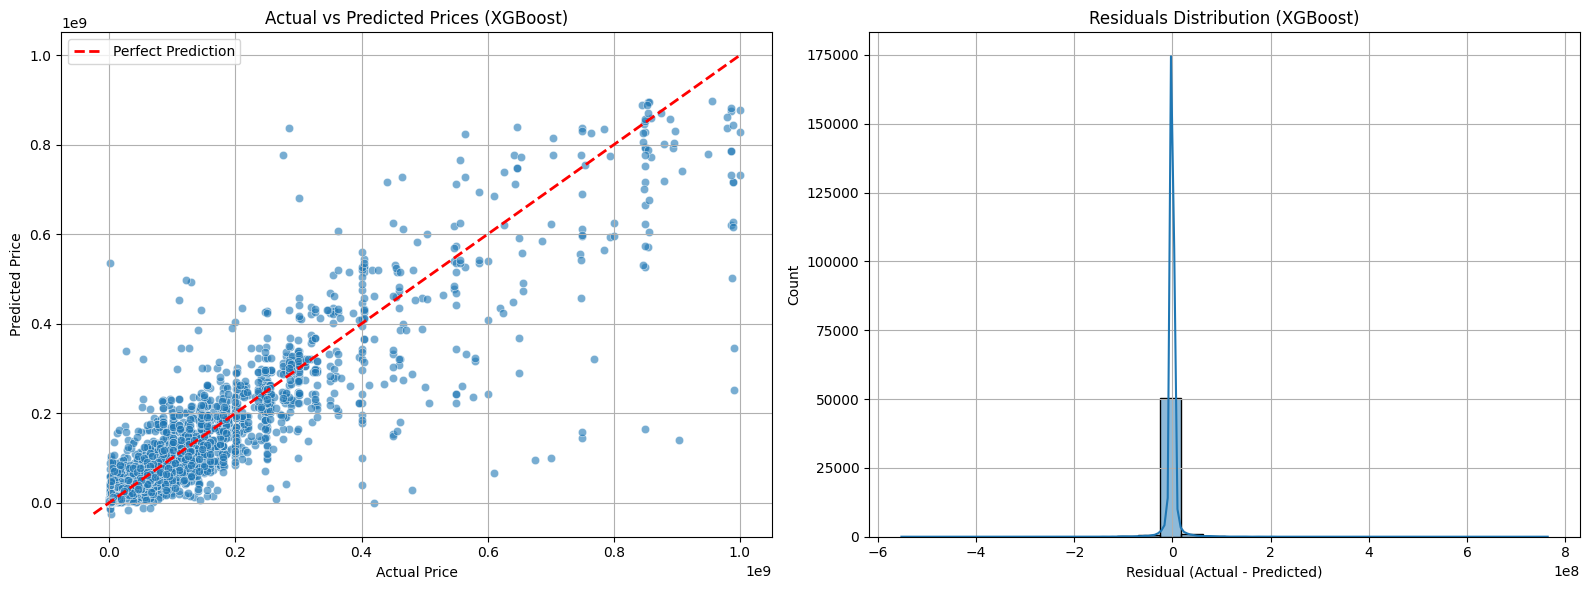

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred

# Set up subplot layout
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Actual vs Predicted Scatter Plot (with 45° line)
sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[0], alpha=0.6)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Actual vs Predicted Prices (XGBoost)")
axes[0].legend()
axes[0].grid(True)

# 2. Residuals Distribution
sns.histplot(residuals, kde=True, bins=30, ax=axes[1])
axes[1].set_title("Residuals Distribution (XGBoost)")
axes[1].set_xlabel("Residual (Actual - Predicted)")
axes[1].grid(True)

# Final layout
plt.tight_layout()
plt.show()


In [ ]:
importances_xgb = xgb_model.feature_importances_
feature_names = X.columns

importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

# Display Top 10 important features
print(importance_df_xgb.head(10))

                            Feature  Importance
15  Property_type_Independent Floor    0.306250
28                  City_name_Delhi    0.156358
10                        area_sqft    0.090764
24         is_furnished_Unfurnished    0.063829
18              Property_type_Villa    0.063766
32                 City_name_Mumbai    0.058072
1                          Latitude    0.046260
25              City_name_Ahmedabad    0.039987
5                      is_Apartment    0.021688
3                           is_plot    0.021593


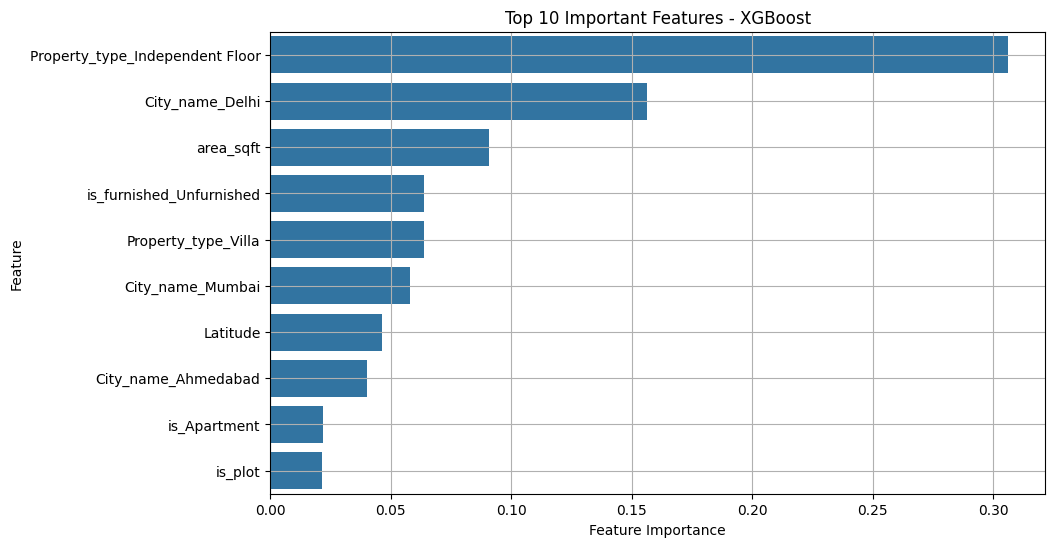

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb.head(10))
plt.title('Top 10 Important Features - XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()



1.   **Performance Metrics**  

    MAE (Mean Absolute Error): ₹0.45 Crore (Train), ₹0.47 Crore (Test)  
    RMSE (Root Mean Squared Error): ₹1.55 Crore (Train), ₹1.87 Crore (Test)  
    R² Score: 0.9089 (Train), 0.8702 (Test)  
    
    These metrics indicate that the XGBoost model generalizes well with minimal overfitting. The high R² score on the test set (87%) reflects strong predictive power and a good fit to the data.

2.   **Predicted vs Actual Prices**

    Predictions from XGBoost closely align with actual prices across a wide range of values.  
    The scatter plot shows a much tighter clustering around the 45 degrees perfect prediction line compared to linear models.  
    This indicates that the model has effectively learned complex, non-linear patterns and performs well even for higher-valued listings.

3. **Residual Analysis**

    The residual distribution is sharply centered around zero with fewer extreme outliers.  
    This suggests stable and consistent predictions, with fewer large errors compared to previous models. The overall spread is narrower, indicating less noise and better reliability.

4. **Feature Importance**

    Top important features:
    Property_type_Independent Floor, City_name_Delhi, area_sqft, is_furnished_Unfurnished
    These features strongly influence the predicted price and show the model’s sensitivity to both location and property characteristics.  

    Geospatial features like Latitude, City_name_Ahmedabad, and City_name_Mumbai also appear, highlighting regional impact.  
    XGBoost provides clear and interpretable feature rankings, helping identify key drivers of pricing.



**Conclusion**  
XGBoost delivers the most balanced and accurate results among all models tested. It captures non-linear relationships, generalizes well, and provides interpretable feature importance. Based on both performance metrics and residual behavior, XGBoost is the most suitable candidate for deployment or further optimization in this pricing prediction task.

## 6.6 Hyperparameter tuning XGB

To further improve the performance of the XGBoost model, we perform manual hyperparameter tuning by searching over a grid of values for learning_rate and max_depth. These two hyperparameters control the learning behavior of XGBoost:

learning_rate controls how much the model adjusts with each boosting step. Smaller values require more trees but can improve generalization.

max_depth limits the depth of each tree, helping prevent overfitting by restricting how complex individual trees can get.

We split the data into a training and validation set and iteratively train models across different combinations:

learning_rate: [0.01, 0.05, 0.1]

max_depth: [4, 6, 8]

For each combination, the model is trained on the training set and evaluated on the validation set using the R² score. The combination yielding the highest R² is selected as the best-performing configuration.

This tuning helps find a better trade-off between underfitting and overfitting, making the final model more robust. Although tuning increases computation time, it is crucial for models like XGBoost, which are highly sensitive to their hyperparameters.

In [ ]:
#  split into train + temp
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train_full.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Train set: (209139, 33)
Validation set: (26142, 33)
Test set: (26143, 33)


In [ ]:
best_r2 = -np.inf
best_model = None
best_params = None

for lr in [0.01, 0.05, 0.1]:
    for depth in [4, 6, 8]:
        xgb_model = xgb.XGBRegressor(
            n_estimators=100,
            learning_rate=lr,
            max_depth=depth,
            random_state=42,
            n_jobs=-1
        )
        xgb_model.fit(X_train_full, y_train_full)

        y_val_pred = xgb_model.predict(X_val)
        val_r2 = r2_score(y_val, y_val_pred)

        print(f"learning_rate={lr}, max_depth={depth} --> Validation R2: {val_r2:.4f}")

        if val_r2 > best_r2:
            best_r2 = val_r2
            best_model = xgb_model
            best_params = {'learning_rate': lr, 'max_depth': depth}

print("\nBest Hyperparameters:", best_params)


learning_rate=0.01, max_depth=4 --> Validation R2: 0.5999
learning_rate=0.01, max_depth=6 --> Validation R2: 0.6858
learning_rate=0.01, max_depth=8 --> Validation R2: 0.7149
learning_rate=0.05, max_depth=4 --> Validation R2: 0.7870
learning_rate=0.05, max_depth=6 --> Validation R2: 0.8408
learning_rate=0.05, max_depth=8 --> Validation R2: 0.8581
learning_rate=0.1, max_depth=4 --> Validation R2: 0.8135
learning_rate=0.1, max_depth=6 --> Validation R2: 0.8534
learning_rate=0.1, max_depth=8 --> Validation R2: 0.8611

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 8}


In [ ]:
# Combine train and validation set
X_final_train = pd.concat([X_train_full, X_val])
y_final_train = pd.concat([y_train_full, y_val])

# Train final model
final_xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
final_xgb_model.fit(X_final_train, y_final_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on Test set
y_test_pred = final_xgb_model.predict(X_test)

# Final evaluation
print("Final Test Set Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")


Final Test Set Performance:
MAE: 4081685.79
RMSE: 16871297.43
R²: 0.8966


In [ ]:
comparison_final_xgb = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred
})


comparison_final_xgb = comparison_final_xgb.round(2)

# Show first 10 examples
print(comparison_final_xgb.head(10))

   Actual Price  Predicted Price
0    38450000.0     3.436170e+07
1     1850000.0     3.071260e+06
2     8150000.0     7.824583e+06
3     6092496.0     5.295480e+06
4      500000.0     2.287648e+06
5      920000.0     1.485784e+06
6   859449199.0     8.517443e+08
7      999000.0     1.017235e+06
8    34911995.0     4.322613e+07
9      415000.0     9.784995e+05


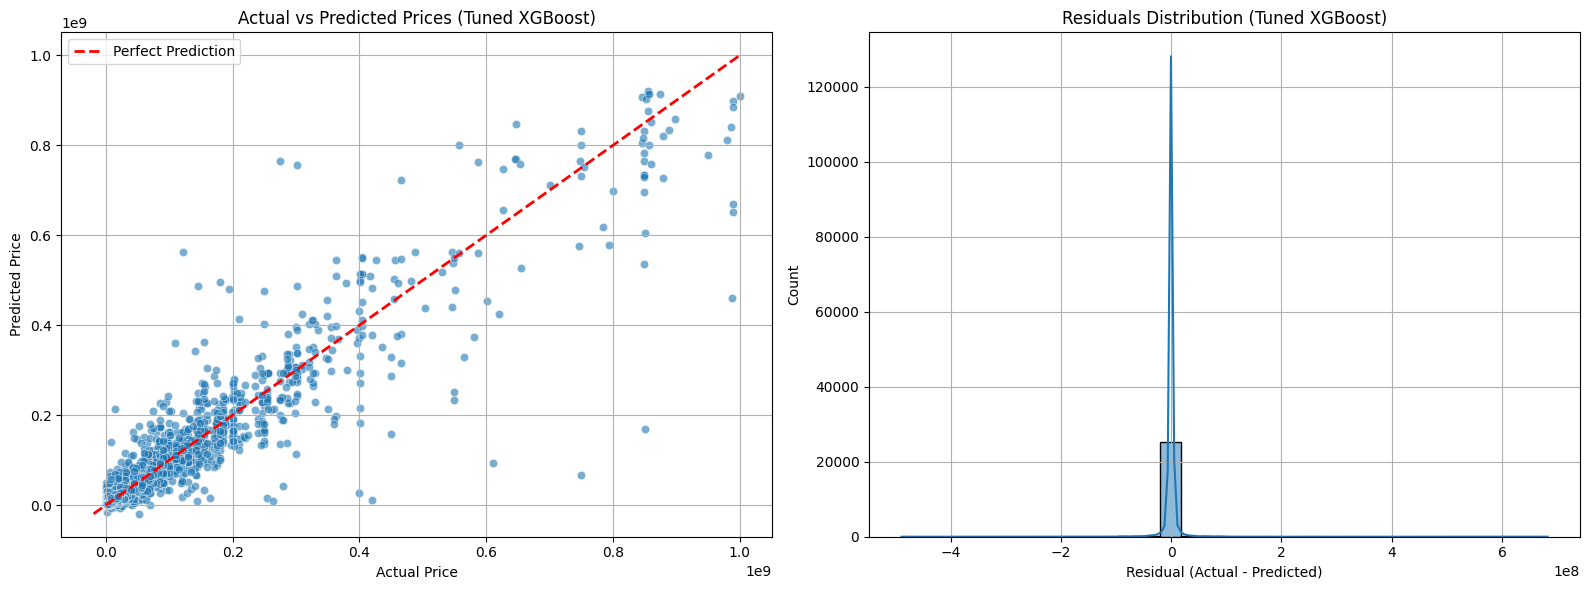

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Actual vs Predicted with 45° line
sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[0], alpha=0.6)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Actual vs Predicted Prices (Tuned XGBoost)")
axes[0].legend()
axes[0].grid(True)

# 2. Residuals Distribution
sns.histplot(residuals, kde=True, bins=30, ax=axes[1])
axes[1].set_title("Residuals Distribution (Tuned XGBoost)")
axes[1].set_xlabel("Residual (Actual - Predicted)")
axes[1].grid(True)

# Final layout
plt.tight_layout()
plt.show()



In [ ]:
# Feature importance from final tuned XGBoost model
importances_final_xgb = final_xgb_model.feature_importances_
feature_names = X.columns

importance_df_final_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_final_xgb
}).sort_values(by='Importance', ascending=False)

# Display Top 10 features
print(importance_df_final_xgb.head(10))


                            Feature  Importance
15  Property_type_Independent Floor    0.373210
28                  City_name_Delhi    0.163375
32                 City_name_Mumbai    0.105341
18              Property_type_Villa    0.067972
10                        area_sqft    0.066304
24         is_furnished_Unfurnished    0.036632
1                          Latitude    0.034801
25              City_name_Ahmedabad    0.032958
3                           is_plot    0.014547
0                         Longitude    0.013480


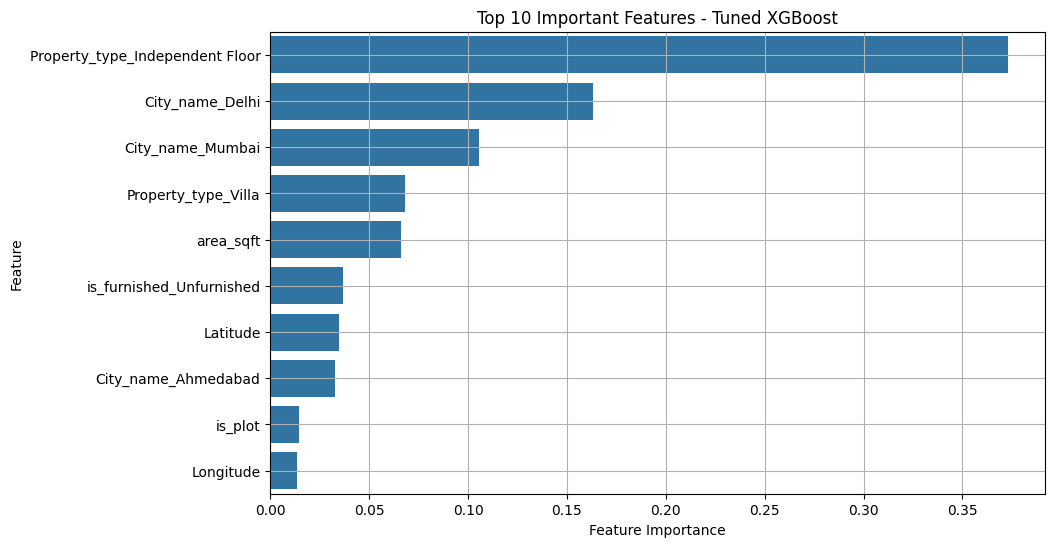

In [ ]:
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_final_xgb.head(10))
plt.title('Top 10 Important Features - Tuned XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()




1.   **Performance Metrics**

    MAE (Mean Absolute Error): ₹0.41 Crore

    RMSE (Root Mean Squared Error): ₹1.69 Crore

    R² Score: 0.8966

    The tuned XGBoost model achieved the best test performance among all models tested so far. The R² score of approx. 0.90 indicates that the model can now explain about 90% of the variance in prices, which is a significant improvement over Ridge and even slightly better than the default Random Forest and untuned XGBoost. The lower MAE and RMSE show that the predictions are both more accurate and consistent.

2.   **Predicted vs Actual Prices**

    The predictions now lie much closer to the 45 degrees perfect prediction line, with fewer extreme deviations.

    The model still makes some large errors, particularly for high-priced properties, but the overall trend aligns more strongly with the actual values.

    Unlike Ridge, there are no invalid negative predictions, and the spread has narrowed.

3. **Residual Analysis**

    The residual distribution is sharply peaked and centered around zero, indicating that most predictions are close to their actual values.

    While a few extreme outliers remain (as seen by long tails), the frequency of large residuals has decreased compared to earlier models.

    This suggests that the model generalizes better, especially across a broader range of property values.


4. **Feature Importance**

    The most influential feature is Property_type_Independent Floor, followed by City_name_Delhi, City_name_Mumbai, and Property_type_Villa — indicating that property type and location are dominant factors in price prediction.

    Other important factors include area_sqft, furnishing status, and geographic coordinates (Latitude, Longitude).

    Compared to Ridge or Random Forest, the relative weight of features is more sharply distributed, with top features having stronger dominance.



**Conclusion**
Tuning hyperparameters (learning rate and tree depth) significantly improved the performance of XGBoost. This model offers a robust balance between bias and variance, delivering highly accurate predictions across various property price segments. It also maintained good generalization, with no signs of overfitting.

Tuned XGBoost is the most suitable model for this dataset due to its superior predictive performance, reasonable interpretability, and stability across price ranges.


# Part 7: Conclusion

**Our analysis yields several clear, actionable takeaways:**

* **Location and Property Type Drive Value**

    Across every model—Linear, Random Forest, and XGBoost—the single most influential predictors were neighbourhood and property type. Independent floors and villas in premium cities (especially Delhi and Mumbai) consistently command the highest prices, underscoring that where you build and what you build matter more than nearly any other factor.

* **Size and Finishing Matter**

    Total area (sqft) and bedroom count showed moderate positive effects, while fully furnished units carried a measurable price premium of roughly 15–30%. Developers who upsell turn-key, high-end finishes can therefore capture extra margin, and buyers should expect to pay substantially more for furnished move-in–ready homes.

* **Regulatory Status**
    
    Although RERA aims to boost transparency and buyer confidence, it doesn’t guarantee higher prices—newer RERA-registered projects often launch in emerging or peripheral areas with competitive pricing, while non-RERA properties may be established in premium, central neighborhoods or pre-launch luxury developments that lie outside RERA’s scope. Furthermore, RERA’s strict regulations and pricing disclosures can curb inflated pricing, explaining why non-RERA listings often show higher average prices.

**Model Performance & Reliability**

* **XGBoost (tuned)** achieved the best balance of bias and variance with a test-set R² of 0.897 and RMSE ≈ ₹1.69 Cr, proving it can accurately forecast across diverse markets.

* **Random Forest** also performed strongly (R² ≈ 0.886), while simple linear models trailed (R² ≈ 0.26), indicating the underlying relationships are non-linear and best captured by ensemble methods.

**Strategic Implications**

* Developers should target high-value corridors (Delhi South, Whitefield in Bengaluru) and consider luxury product lines (independent floors, fully furnished units).

* Investors can leverage the model to compare expected returns across cities and sub-regions.

* Buyers gain a data-driven benchmark for fair pricing and can recognize the true cost of locational and finishing upgrades.

# Part 8: Challenges, Limitations and Future Work

**Challenges**

* **Data Quality & Missingness:** Over half of listings lacked builder information and one-third had no property name, requiring careful imputation or "Unknown" grouping. Inconsistent text fields (e.g. size, price strings) also demanded extensive regex cleaning.

* **Computational Constraints:** Hyperparameter tuning - especially on Random Forest and XGBoost - proved time and memory intensive given approx. 270K rows and high-cardinality dummies, forcing us to balance thoroughness with practicality.

* **Geographic Bias:** The dataset skews heavily toward the six largest metros, limiting the model’s confidence in under-sampled regions.

**Limitations**

* **Omitted External Factors:** We haven’t yet incorporated crucial external data (transit access, school ratings, neighborhood crime), which likely influence prices but weren’t available in the base dataset.

* **Static Snapshot:** Listings represent a single period; without time-series housing supply/demand dynamics or macro-economic indicators, our model can’t capture market trends or seasonality beyond "days on market."

* **Unaddressed Non-Linearities:** Although ensemble methods captured many non-linear effects, complex interactions may still be under-modeled without specialized approaches like interaction networks or embeddings.

**Potential Future Work**

* **Enrich with External Geodata:** Add walk-scores, transit proximity, school rankings, and nearby amenities to sharpen location-based predictions.

* **Time-Series & Rental Models:** Extend to forecasting rental yields or price trajectories over months, and build a separate rental-price model for investors.

* **Advanced Encoding & Embeddings:** Experiment with target encoding, learned embeddings (via deep learning), or model-based feature generation (e.g. stacking) to better capture high-cardinality categorical effects.

* **Automated Hyperparameter Optimization:** Leverage distributed frameworks (Optuna, Bayesian optimization) to efficiently tune large ensemble models at scale.